In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab import *
import scipy.optimize as op
import emcee
import corner

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors

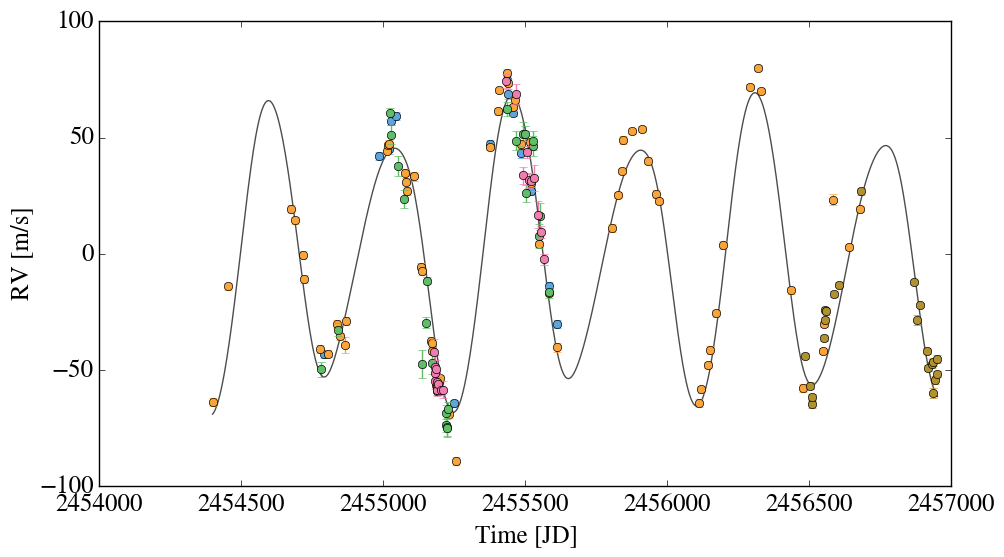

Saved


In [255]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.add_planet(per = 429.96951043, mass = 2.979157 , M = 63.748569, e=0.041800, pomega = 136.84729)
HD1502.add_planet(per = 765.37792853, mass =  0.321007, M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch,save=1)

In [257]:
print HD1502.calc_chi2(epoch=epoch)/(152-20),HD1502.log_like(epoch=epoch)

45.1088986941 -3219.37193722


In [27]:
ratio_1 = (HD1502.planets[0].per/HD1502.planets[1].per)**(-1)
ratio_2 = (HD1502.planets[1].per/HD1502.planets[2].per)
ratio_3 = (HD1502.planets[0].per/HD1502.planets[2].per)


print ratio_1,ratio_2,ratio_3

1.78007488895 2.73249067807 1.53504253952


 0 %
 9 %
Integration took 0.72181 seconds
Energy Error is 18.339% 


0

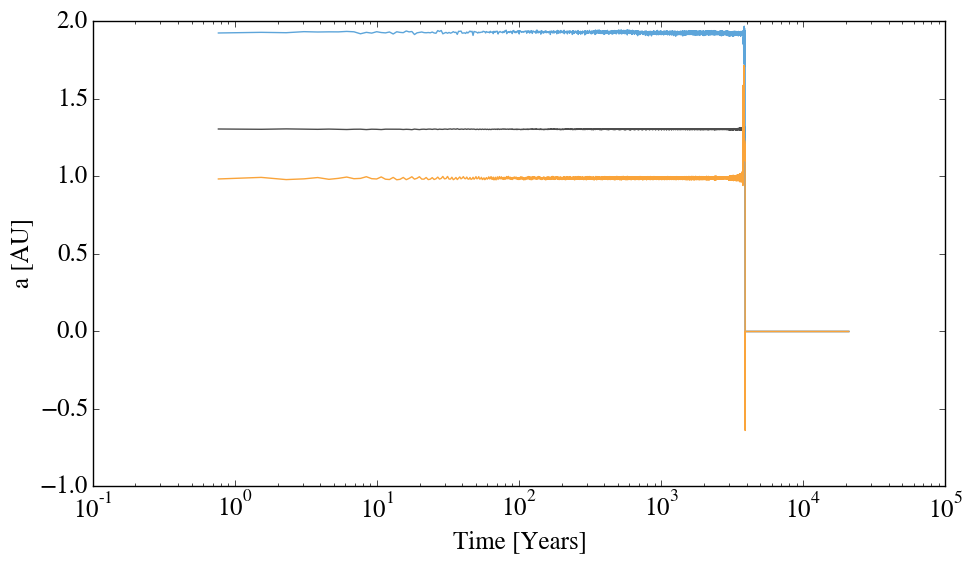

In [4]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=5,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 33.88483 seconds
Energy Error is 0.000% 


1

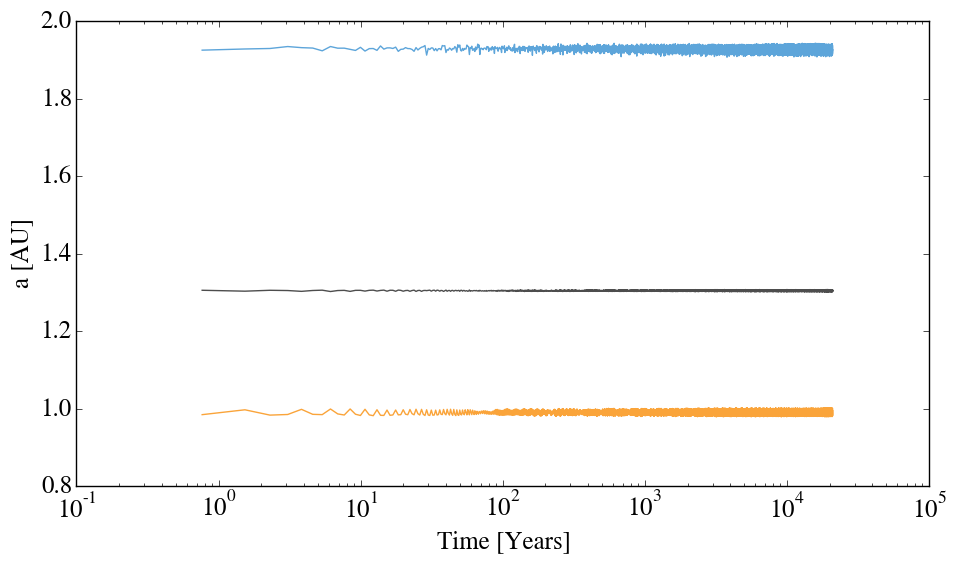

In [7]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=10,outputs_per_period=1,verbose=1,integrator='ias15',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [5]:
for planet in HD1502.planets:
    print planet.per, planet.mass

429.96951043 0.00284384368906
765.37792853 0.00030642686206
280.10266775 0.0004074720188


In [7]:
print 765.378/429.9695, 429.9565/280.10266775

1.78007509835 1.53499609073


In [27]:
(3*HD1502.planets[0].l-2*HD1502.planets[2].l-HD1502.planets[2].pomega)%(360)

351.24570700000004

In [28]:
(3*HD1502.planets[0].l-2*HD1502.planets[2].l-HD1502.planets[0].pomega)%(360)

171.24570700000004

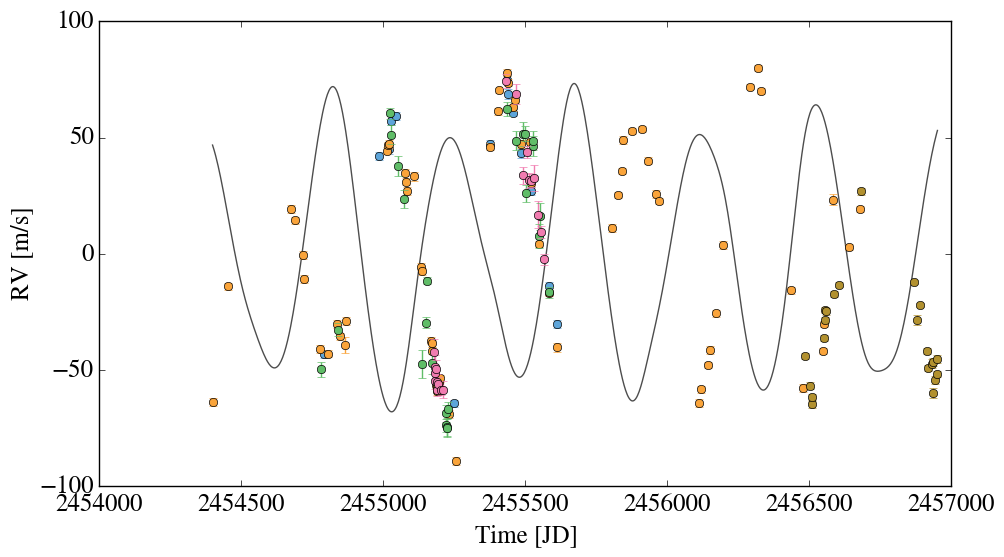

In [7]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.add_planet(per = 429.96951043, mass = 2.979157 , M = 63.748569, e=0.041800, pomega = 136.84729+180)
HD1502.add_planet(per = 765.37792853, mass =  0.321007, M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

 0 %
 9 %
Integration took 0.61803 seconds
Energy Error is 18.339% 


0

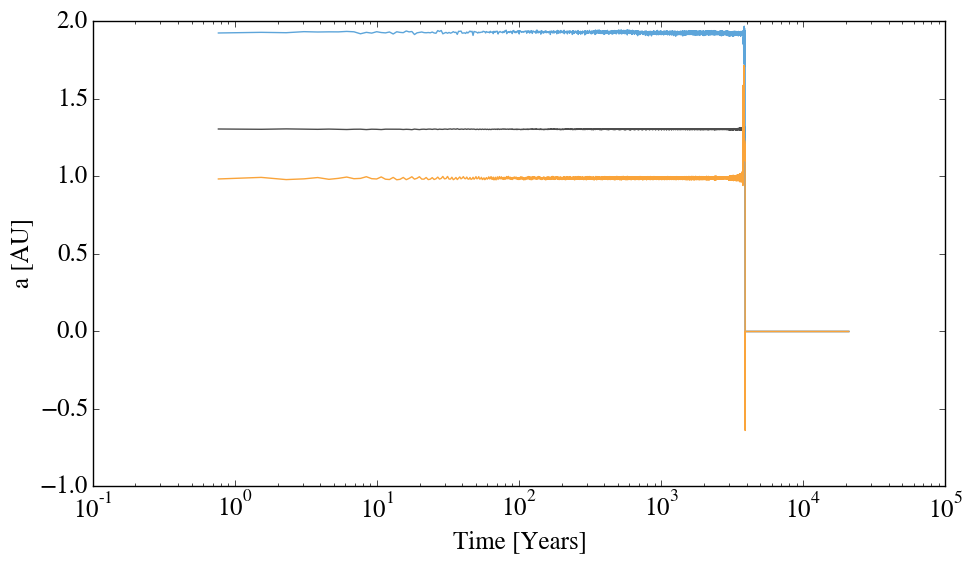

In [13]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=5,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [16]:
t0 = time.time()
print HD1502.stab_logprob(epoch=epoch)
print "That took %.5f seconds" %(time.time() - t0)

-3219.37193722
That took 2.27669 seconds


# Optimize Over Period

In [64]:
def per_mass_test(params,other_params,RVsys):
    per_1, per_2, per_3 = params
    mass_1, M_1, e_1, pomega_1, mass_2, M_2, e_2, pomega_2, mass_3, M_3, e_3, pomega_3, epoch = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    return -RVsys.stab_logprob(epoch=epoch)

In [65]:
other_params = [2.979157, 63.748569, 0.041800, 136.84729,0.321007, 118.50653, 0.051500, 75.245987,
               0.426860, 190.00000, 0.1, 316.84729,epoch]

params = [429.96951043, 765.37792853, 280.10266775]

per_mass_test(params,other_params,HD1502)

3219.3719372173173

In [66]:
t_0 = time.time()
result = op.minimize(per_mass_test,params, args=(other_params,HD1502))
print "That took %.3f seconds" %(time.time()-t_0)

That took 3821.449 seconds


In [67]:
result.x[0]

427.66559689341921

In [70]:
# np.savetxt('opt_per_from_rmc',result.x)

In [18]:
per_mass_test(result.x,other_params,HD1502)

2707.2283189195787

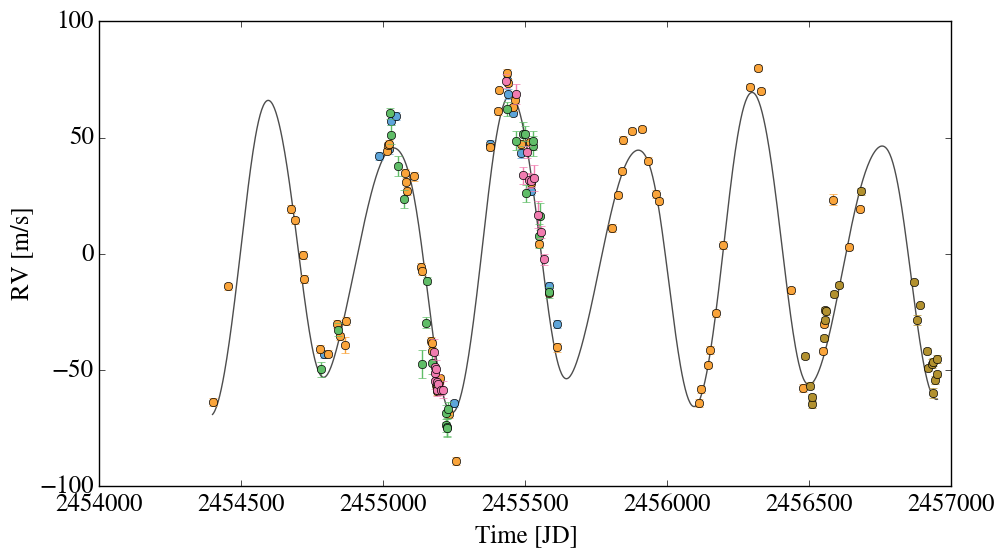

In [81]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

HD1502.add_planet(per = result.x[0], mass = 2.979157 , M = 63.748569, e=0.041800, pomega = 136.84729)
HD1502.add_planet(per = result.x[1], mass =  0.321007, M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = result.x[2], mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 3.72501 seconds
Energy Error is 0.000% 


1

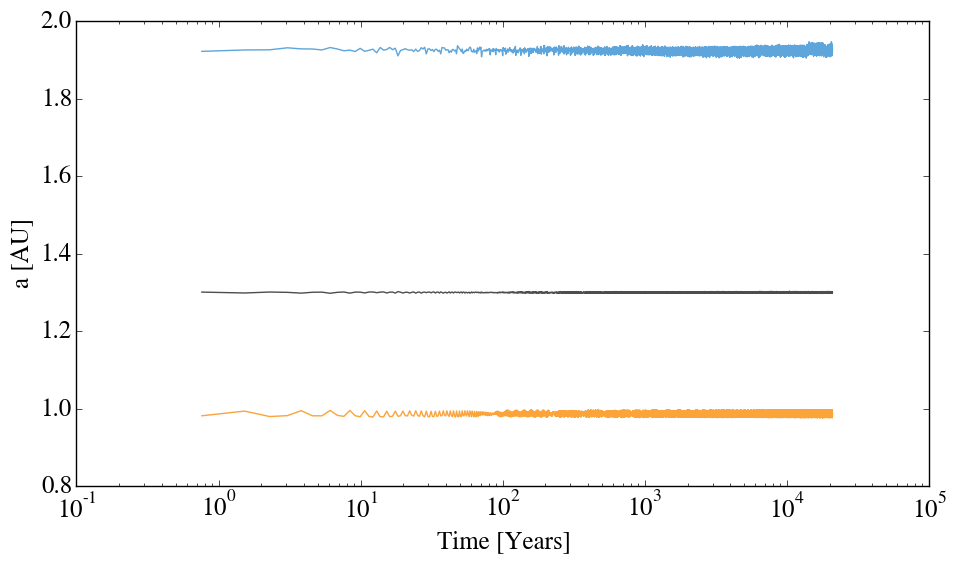

In [82]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [72]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

37.349146901728425

# Optimize over period and mass

In [83]:
def per_mass_test(params,other_params,RVsys):
    per_1, mass_1, per_2, mass_2, per_3, mass_3 = params
    M_1, e_1, pomega_1, M_2, e_2, pomega_2, M_3, e_3, pomega_3, epoch = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    return -RVsys.stab_logprob(epoch=epoch)

In [84]:
new_pers = result.x

In [86]:
other_params = [63.748569, 0.041800, 136.84729, 118.50653, 0.051500, 75.245987,
               190.00000, 0.1, 316.84729,epoch]

params = [new_pers[0], 2.979157, new_pers[1], 0.321007, new_pers[2], 0.426860]

per_mass_test(params,other_params,HD1502)

2707.2283189195787

In [87]:
t_0 = time.time()
result = op.minimize(per_mass_test,params, args=(other_params,HD1502))
print "That took  %.3f seconds" %(time.time()-t_0)

That took 27865.885 seconds


In [135]:
print result.x

[  4.27572481e+02   2.87887973e+00   7.63857742e+02   4.92420795e-01
   2.78659908e+02   4.16761902e-01]


In [89]:
np.savetxt('opt_per_mass_from_rmc',result.x)

In [129]:
result.x = np.loadtxt('opt_per_mass_from_rmc')

In [4]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

HD1502.add_planet(per = result.x[0], mass = result.x[1] , M = 63.748569, e=0.041800, pomega = 136.84729)
HD1502.add_planet(per = result.x[2], mass = result.x[3], M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = result.x[4], mass = result.x[5], M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

NameError: name 'result' is not defined

In [91]:
per_mass_test(result.x,other_params,HD1502)

2556.4433327856686

In [92]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

35.064525899699461

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
Integration took 286.26545 seconds
Energy Error is 137.228% 


0

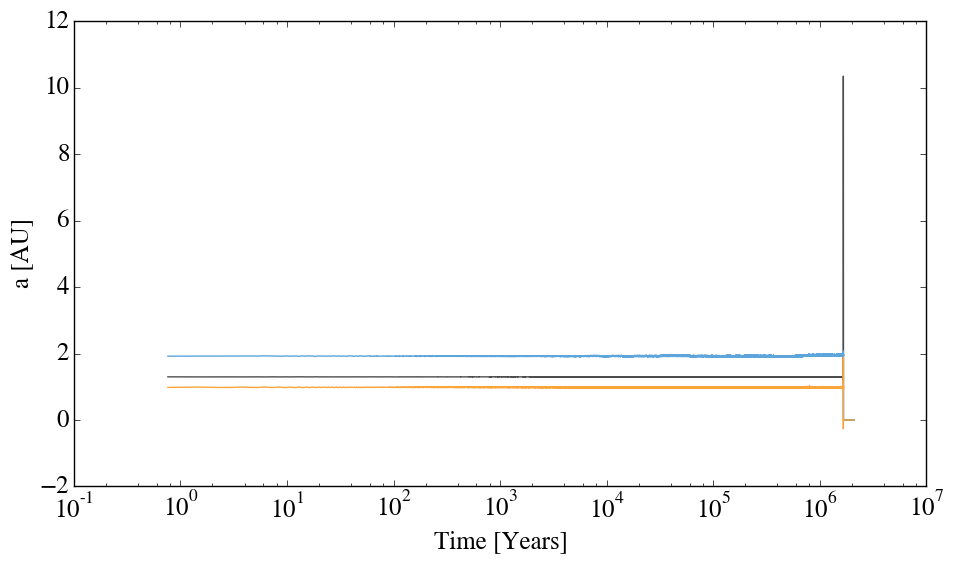

In [95]:
HD1502.orbit_stab(periods=1e6,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

# Optimize over period, mass, and eccentricity

In [155]:
def per_mass_ecc(params,other_params,RVsys,verb=0):
    per_1, mass_1, e_1, per_2, mass_2, e_2, per_3, mass_3, e_3 = params
    M_1, pomega_1, M_2, pomega_2, M_3, pomega_3, epoch = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    
    if verb:
        print "per_1 = %.3f \nmass_1 = %.3f \ne_1 = %.3f \nper_2 = %.3f \nmass_2 = %.3f \ne_2 = %.3f \nper_3 = %.3f \nmass_3 = %.3f \ne_3 = %.3f\n\n" %(np.abs(per_1-per_mass_ecc.per_1), np.abs(mass_1-per_mass_ecc.mass_1),
                                                   np.abs(e_1-per_mass_ecc.e_1), np.abs(per_2-per_mass_ecc.per_2), 
                                                   np.abs(mass_2-per_mass_ecc.mass_2), np.abs(e_2-per_mass_ecc.e_2), 
                                                   np.abs(per_3-per_mass_ecc.per_3), np.abs(mass_3-per_mass_ecc.mass_3)
                                                   , np.abs(e_3-per_mass_ecc.e_3))
    per_mass_ecc.per_1 = per_1
    per_mass_ecc.per_2 = per_2
    per_mass_ecc.per_3 = per_3
    per_mass_ecc.mass_1 = mass_1
    per_mass_ecc.mass_2 = mass_2
    per_mass_ecc.mass_3 = mass_3
    per_mass_ecc.e_1 = e_1
    per_mass_ecc.e_2 = e_2
    per_mass_ecc.e_3 = e_3
    return -RVsys.stab_logprob(epoch=epoch)

In [136]:
new_params = result.x

In [156]:
other_params = [63.748569, 136.84729, 118.50653, 75.245987,
               190.00000, 316.84729,epoch]

params = [new_params[0], new_params[1], 0.0418, new_params[2], new_params[3], 0.0515, 
          new_params[4], new_params[5], 0.1]

per_mass_ecc.per_1 = new_params[0]
per_mass_ecc.per_2 = new_params[2]
per_mass_ecc.per_3 = new_params[4]
per_mass_ecc.mass_1 = new_params[1]
per_mass_ecc.mass_2 = new_params[3]
per_mass_ecc.mass_3 = new_params[5]
per_mass_ecc.e_1 = 0.0418
per_mass_ecc.e_2 = 0.0515
per_mass_ecc.e_3 = 0.1

per_mass_ecc(params,other_params,HD1502,verb=1)

per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000




2556.4433327856686

In [157]:
t_0 = time.time()
bounds = [(None,None),(None,None),(1e-4,0.95),(None,None),(None,None),(1e-4,0.95),(None,None),(None,None),(1e-4,0.95)]
result = op.minimize(per_mass_ecc,params, args=(other_params,HD1502,1),bounds=bounds)
print "That took %.3f seconds" %(time.time()-t_0)

per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0

In [158]:
print result.x

[  4.27572481e+02   2.87887973e+00   4.18000000e-02   7.63857742e+02
   4.92420795e-01   5.15000000e-02   2.78659908e+02   4.16761902e-01
   1.00000000e-01]


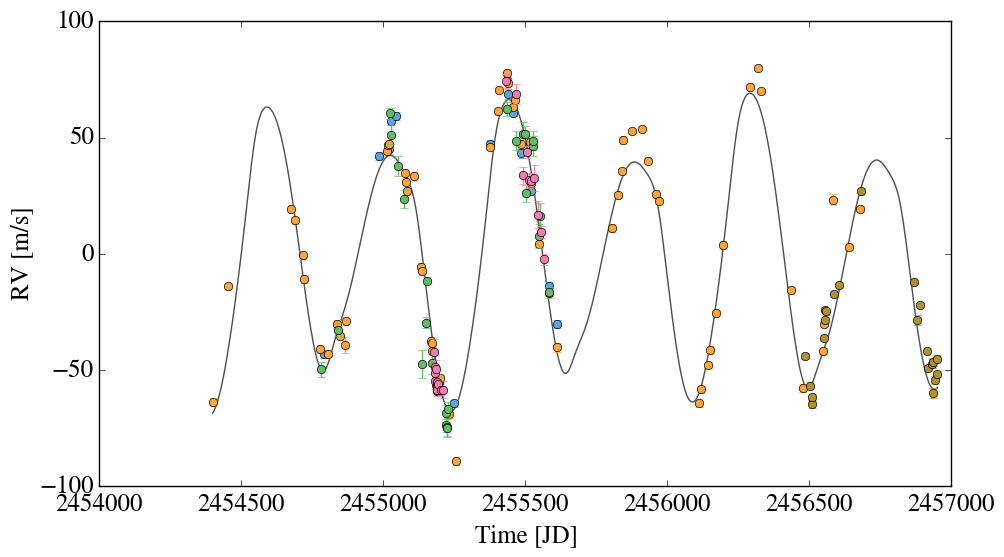

In [125]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

HD1502.add_planet(per = result.x[0], mass = result.x[1] , M = 63.748569, e=result.x[2], pomega = 136.84729)
HD1502.add_planet(per = result.x[3], mass = result.x[4], M = 118.50653, e=result.x[5], pomega = 75.245987)
HD1502.add_planet(per = result.x[6], mass = result.x[7], M = 190.00000, e=0.3, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [126]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

33.45154331140035

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 3.11233 seconds
Energy Error is 0.038% 


1

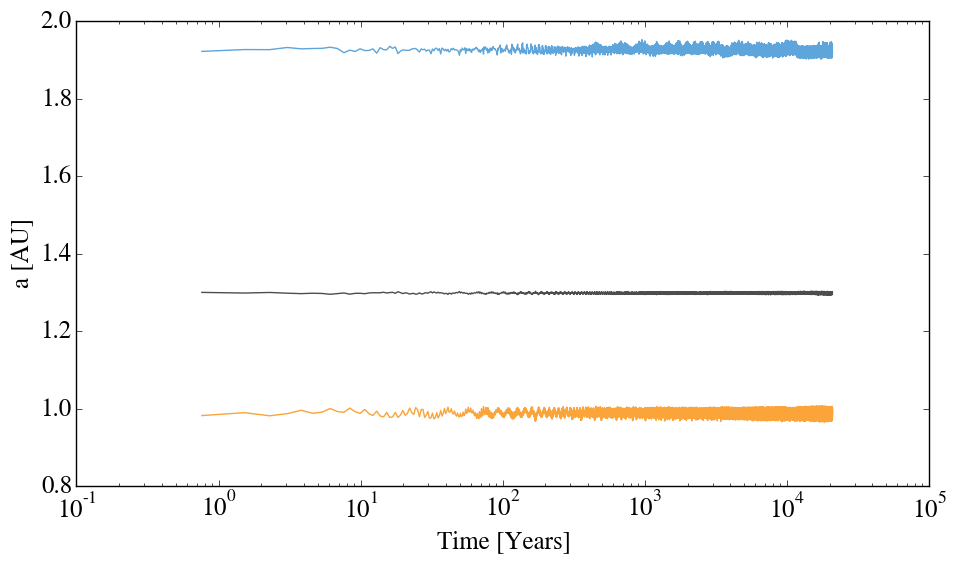

In [127]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=10,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

# Try just eccentricity

In [6]:
def ecc_opt(params,other_params,RVsys,verb=0):
    e_1, e_2, e_3,  = params
    per_1, mass_1, M_1, pomega_1, per_2, mass_2, M_2, pomega_2, per_3, mass_3, M_3, pomega_3, epoch = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    
    if verb:
        print "e_1 = %.9f \ne_2 = %.9f \ne_3 = %.9f\n" %(np.abs(e_1-ecc_opt.e_1), np.abs(e_2-ecc_opt.e_2)
                                                         , np.abs(e_3-ecc_opt.e_3))
        ecc_opt.e_1 = e_1
        ecc_opt.e_2 = e_2
        ecc_opt.e_3 = e_3
    return -RVsys.stab_logprob(epoch=epoch)

In [2]:
new_params = np.loadtxt('opt_per_mass_from_rmc')
print new_params

[  4.27572481e+02   2.87887973e+00   7.63857742e+02   4.92420795e-01
   2.78659908e+02   4.16761902e-01]


In [8]:
other_params = [new_params[0], new_params[1], 63.748569, 136.84729, new_params[2],new_params[3],  118.50653, 
                75.245987, new_params[4], new_params[5], 190.00000, 316.84729,epoch]
               

params = [0.0418, 0.0515, 0.1]
          

# per_mass_ecc.per_1 = new_params[0]
# per_mass_ecc.per_2 = new_params[2]
# per_mass_ecc.per_3 = new_params[4]
# per_mass_ecc.mass_1 = new_params[1]
# per_mass_ecc.mass_2 = new_params[3]
# per_mass_ecc.mass_3 = new_params[5]
ecc_opt.e_1 = params[0]
ecc_opt.e_2 = params[1]
ecc_opt.e_3 = params[2]

ecc_opt(params,other_params,HD1502,verb=1)

e_1 = 0.000000000 
e_2 = 0.000000000 
e_3 = 0.000000000



2556.4433327856686

In [9]:
t_0 = time.time()
bounds = [(0.01287087,0.01287087),(1e-5,2e-1),(2e-1,0.325)]
result = op.minimize(ecc_opt,params, args=(other_params,HD1502,1),bounds=bounds)
print "That took %.3f seconds" %(time.time()-t_0)

e_1 = 0.028929130 
e_2 = 0.000000000 
e_3 = 0.100000000

e_1 = 0.000000010 
e_2 = 0.000000000 
e_3 = 0.000000000

e_1 = 0.000000010 
e_2 = 0.000000010 
e_3 = 0.000000000

e_1 = 0.000000000 
e_2 = 0.000000010 
e_3 = 0.000000010

e_1 = 0.000000000 
e_2 = 0.051490000 
e_3 = 0.124999990

e_1 = 0.000000010 
e_2 = 0.000000000 
e_3 = 0.000000000

e_1 = 0.000000010 
e_2 = 0.000000010 
e_3 = 0.000000000

e_1 = 0.000000000 
e_2 = 0.000000010 
e_3 = 0.000000010

That took 19.114 seconds


In [20]:
result.x

array([  1.28708700e-02,   1.00000000e-05,   3.25000000e-01])

In [3]:
# np.savetxt('ecc_tmp',result.x)
ecc_tmp = np.loadtxt('ecc_tmp')

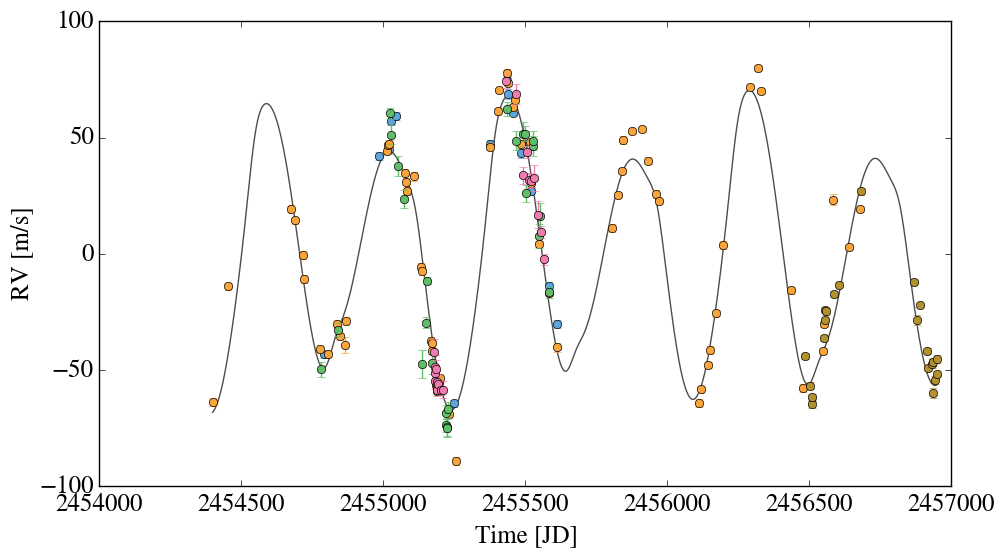

In [42]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = 63.748569, e=ecc_tmp[0], pomega = 136.84729)
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = 118.50653, e=ecc_tmp[1], pomega = 75.245987)
HD1502.add_planet(per = new_params[4], mass = new_params[5], M = 190.00000, e=ecc_tmp[2], pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [43]:
print HD1502.calc_chi2(epoch=epoch)/(152-20),HD1502.stab_logprob(epoch=epoch)


32.1054591033 -2361.14492423


 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 4.23336 seconds
Energy Error is 0.000% 


1

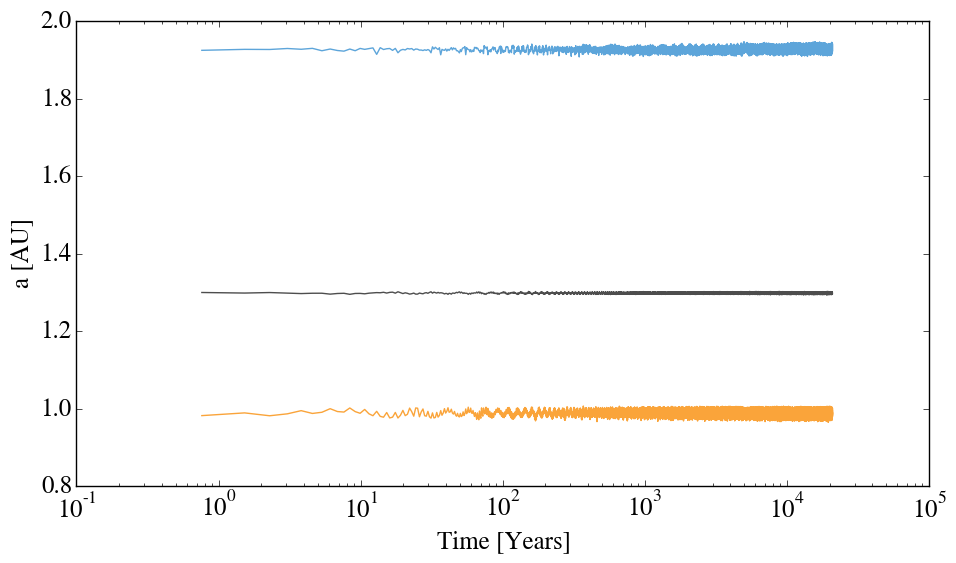

In [5]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=30,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [73]:
new_params[0]

427.57248062418091

# $\phi$ Plotting

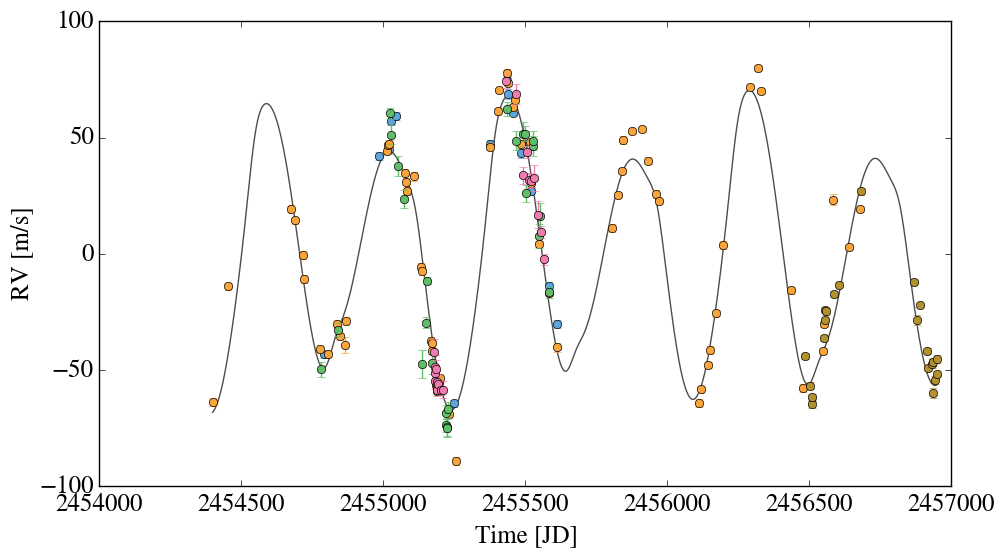

In [39]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = 63.748569, e=ecc_tmp[0], pomega = 136.84729)
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = 118.50653, e=ecc_tmp[1], pomega = 75.245987)
HD1502.add_planet(per = new_params[4], mass = new_params[5], M = 190.00000, e=ecc_tmp[2], pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

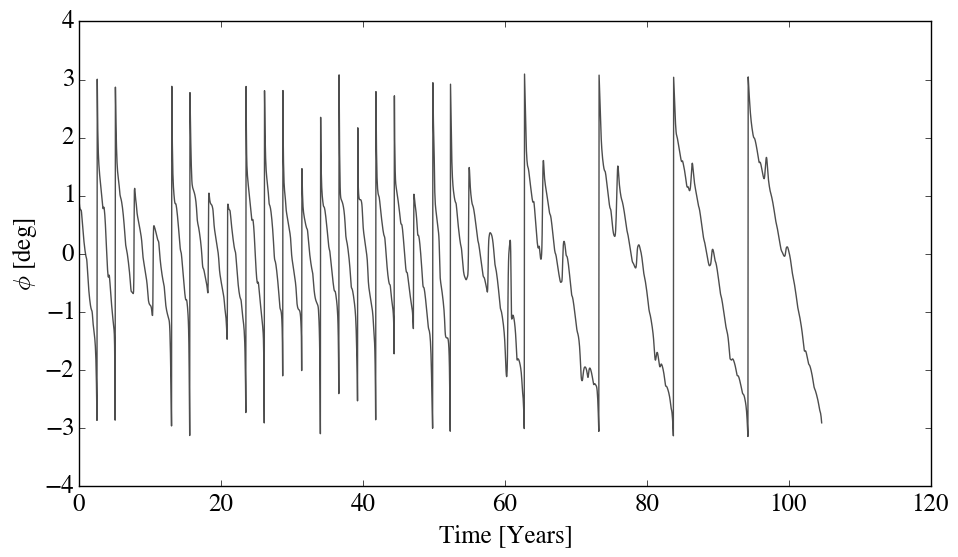

In [14]:
HD1502.plot_phi(pert_ind=0,test_ind=1,p=1,q=1,periods=50)

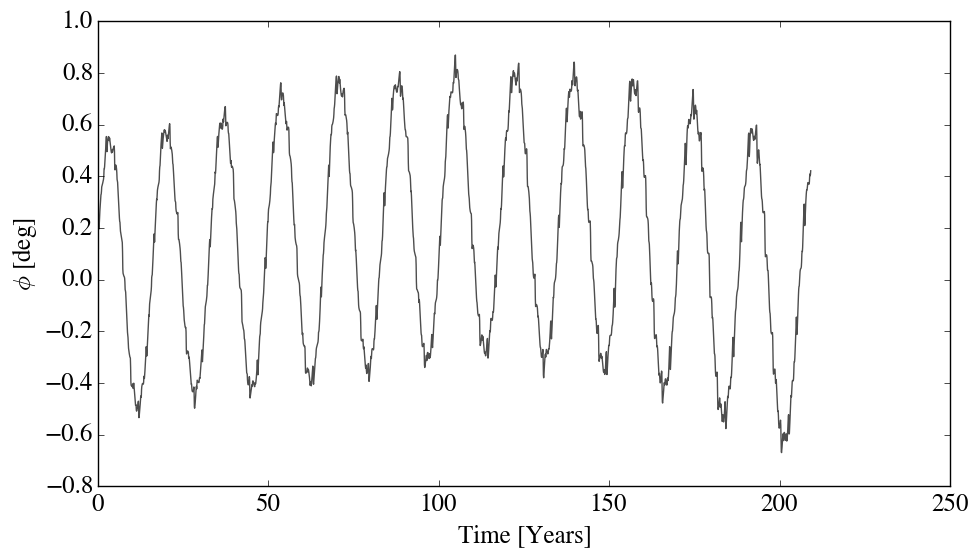

In [6]:
p=2.
q=1.
pert_ind=0
test_ind=2
periods=1e2
pnts_per_period=100.
outputs_per_period=10.
verbose=0
log_t = 0
integrator='whfast'

deg2rad = np.pi/180.
sim = rebound.Simulation()
sim.integrator = integrator
exact = 1
if integrator != 'ias15':
    exact = 0
sim.units = ('day', 'AU', 'Msun')
# sim.t = epoch #Epoch is the starting time of simulation
sim.add(m=HD1502.mstar,hash='star')

min_per = np.inf
max_per = 0

res_inds = [pert_ind,test_ind]

per_max = 0
per_min = np.inf

for i,planet in enumerate(HD1502.planets): #Add planets in self.planets to Rebound simulation
    sim.add(m=planet.mass,P=planet.per,M=planet.M*deg2rad,e=planet.e,pomega=planet.pomega*deg2rad,
            inc=planet.i*deg2rad,Omega=planet.Omega*deg2rad)
    if i in res_inds:
        if planet.per > per_max:
            outer = i
            per_max = planet.per
        if planet.per < per_min:
            inner = i
            per_min = planet.per


    min_per = min(min_per,planet.per) #Minimum period
    max_per = max(max_per,planet.per)

t_max = max_per*periods
Noutputs = int(t_max/min_per*outputs_per_period)
times = np.linspace(0,t_max, Noutputs)

sim.move_to_com()
sim.dt = min_per/pnts_per_period
ps = sim.particles[1:]

pert = ps[pert_ind]
test = ps[test_ind]
outer = ps[outer]
inner = ps[inner]

phi_arr = np.zeros(Noutputs)

for i,t in enumerate(times): #Perform integration
    sim.integrate(t,exact_finish_time = exact)
    phi_arr[i] = ((p+q)*outer.l - p*inner.l - q*test.pomega)%(2*np.pi)
    
angle_fixed = lambda phi: phi-2*np.pi if phi>np.pi else phi

phi_arr = [angle_fixed(phi) for phi in phi_arr]
    
plt.figure(1,figsize=(11,6))

if log_t:
    plt.semilogx(times/365.25,phi_arr)
else:
    plt.plot(times/365.25,phi_arr)

plt.xlabel("Time [Years]")
plt.ylabel(r"$\phi$ [deg]")
# plt.ylim(-10,7)

In [19]:
print HD1502.planets[0].per/HD1502.planets[2].per

1.53438822027


In [24]:
phi_20 =  (3*HD1502.planets[0].l-2*HD1502.planets[2].l-HD1502.planets[2].pomega)%(360)
# print (3*HD1502.planets[0].l-2*HD1502.planets[2].l-HD1502.planets[0].pomega)%(360)

In [27]:
(3*HD1502.planets[0].l - 2*HD1502.planets[2].l - phi_20) % 360.

316.84729

In [30]:
HD1502.planets[2].M

190.0

# Optimize over $\phi$

In [82]:
new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
param_arr = [new_params[0], new_params[1], 63.748569, ecc_tmp[0], 136.84729, new_params[2],new_params[3], 118.50653,
             ecc_tmp[1], 75.245987,new_params[4],new_params[5],ecc_tmp[2],146.84729,epoch]


In [83]:
def phi_opt(phi,other_params,RVsys):
    per_1, mass_1, M_1, e_1, pomega_1, per_2, mass_2, M_2, e_2, pomega_2, per_3, mass_3, e_3, lam_3, epoch = other_params
    lam_1 = (M_1 + pomega_1) % 360.
    pomega_3 = 3*lam_1 - 2*lam_3 - phi
    M_3 = (lam_3 - pomega_3)%360.
    
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    return -RVsys.stab_logprob(epoch=epoch)

In [84]:
phi_opt(phi_20,param_arr,HD1502)

2361.14492402732

In [85]:
t_0 = time.time()
result = op.minimize(phi_opt,phi_20, args=(param_arr,HD1502))
print "That took  %.3f seconds" %(time.time()-t_0)

That took  186.027 seconds


In [86]:
print result.x

[ 337.91628952]


In [87]:
phi = result.x[0]
lam = 146.84729
pomega = 3*HD1502.planets[0].l - 2*lam - phi
M_3 = (lam - pomega)%360.

In [2]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = 63.748569, e=ecc_tmp[0], pomega = 136.84729)
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = 118.50653, e=ecc_tmp[1], pomega = 75.245987)
HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc_tmp[2], pomega = pomega)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

NameError: name 'RVSystem' is not defined

In [89]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

30.716818955784888

 0 %
 9 %
19 %
29 %
39 %
Integration took 20.88430 seconds
Energy Error is 27.547% 
Planet 2 went unstable


0

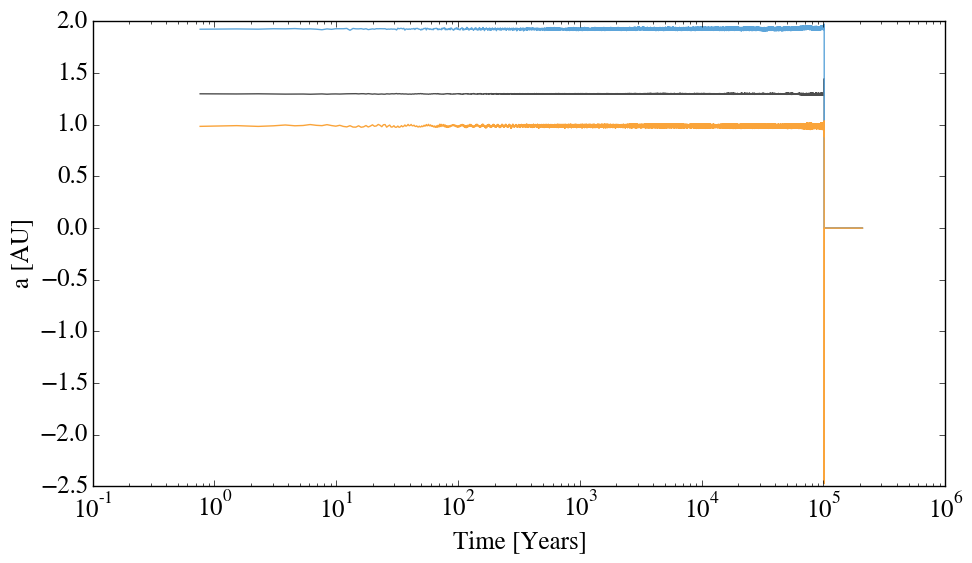

In [61]:
HD1502.orbit_stab(periods=1e5,pnts_per_period=10,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

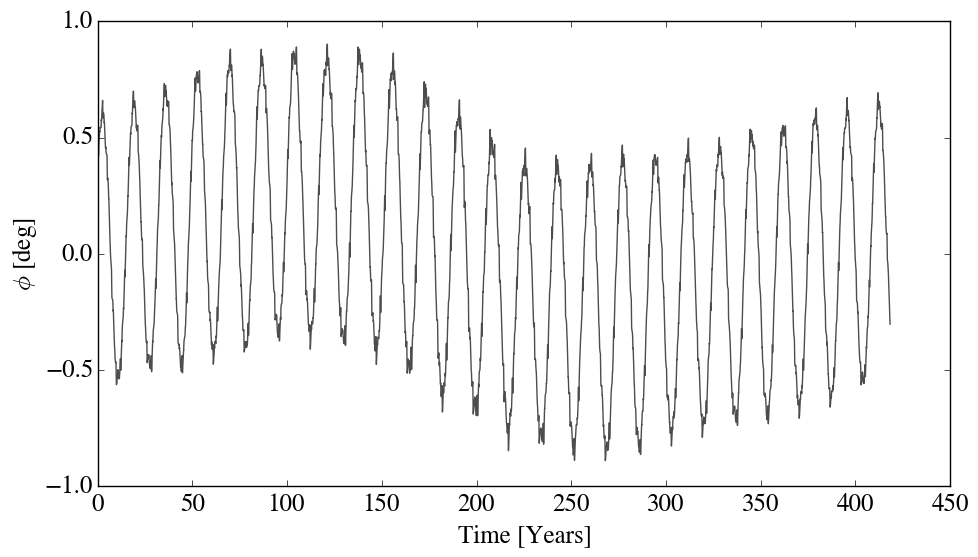

In [62]:
HD1502.plot_phi(pert_ind=0,test_ind=2,p=2,q=1,periods=200)

# Optimize over all angles

In [140]:
new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
M_3 = 176.67058252427182
pomega_3 = 
param_arr = [new_params[0], new_params[1], ecc_tmp[0], new_params[2],new_params[3],
             ecc_tmp[1], new_params[4],new_params[5],ecc_tmp[2],146.84729,epoch]


In [173]:
def phi_ang_opt(params,other_params,RVsys):
    phi,M_1,pomega_1,M_2,pomega_2 = params
    per_1, mass_1, e_1, per_2, mass_2, e_2, per_3, mass_3, e_3, lam_3, epoch = other_params
    lam_1 = (M_1 + pomega_1) % 360.
    pomega_3 = 3*lam_1 - 2*lam_3 - phi
    M_3 = (lam_3 - pomega_3)%360.
    
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    return -RVsys.stab_logprob(epoch=epoch)

In [200]:
params = [337.91628952,63.748569,136.84729,118.50653,75.245987]
phi_ang_opt(params,param_arr,HD1502)

2269.4946745632897

In [204]:
t_0 = time.time()
result = op.minimize(phi_ang_opt,params, args=(param_arr,HD1502))
print "That took  %.3f seconds" %(time.time()-t_0)

That took  325.872 seconds


In [206]:
print result.x
phi_ang_opt(result.x,param_arr,HD1502)

[ 337.94189861   64.1466781   137.41898942  118.54069994   75.60774816]


2268.6973360245329

In [210]:
print result.x,ang_params

[ 337.94189861   64.1466781   137.41898942  118.54069994   75.60774816] [ 337.94189861   64.1466781   137.41898942  118.54069994   75.60774816]


In [211]:
phi = result.x[0]
lam_3 = 146.84729
pomega_3 = 3*HD1502.planets[0].l - 2*lam_3 - phi
M_3 = (lam_3 - pomega_3)%360.

In [119]:
np.savetxt('ang_params',result.x)

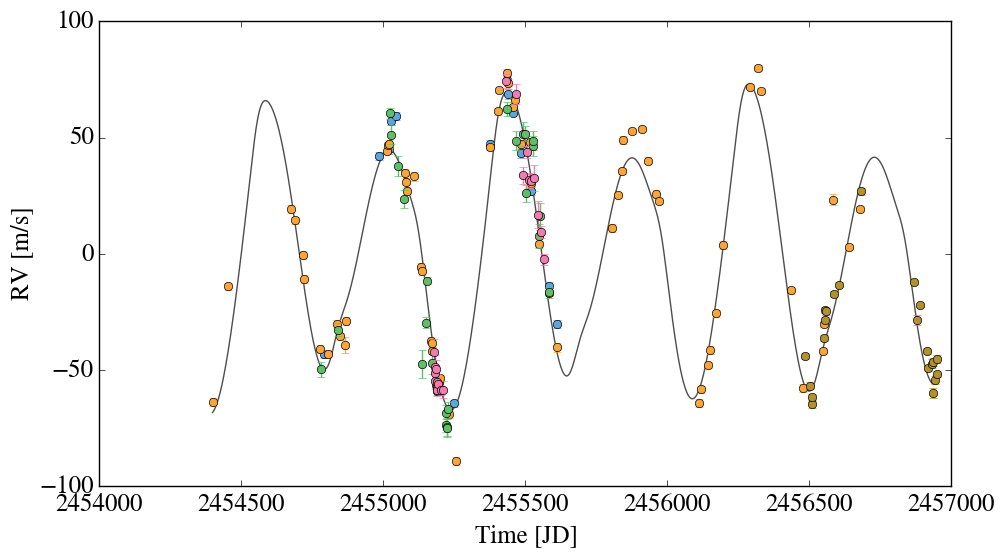

In [212]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = result.x[1], e=ecc_tmp[0], pomega = result.x[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = result.x[3], e=ecc_tmp[1], pomega = result.x[4])
HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc_tmp[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [209]:
print HD1502.log_like(epoch=epoch),HD1502.calc_chi2(epoch=epoch)/(152-20)

-2806.20491656 38.8487923205


 0 %
 9 %
Integration took 66.40448 seconds
Energy Error is 90.328% 
Planet 2 went unstable


0

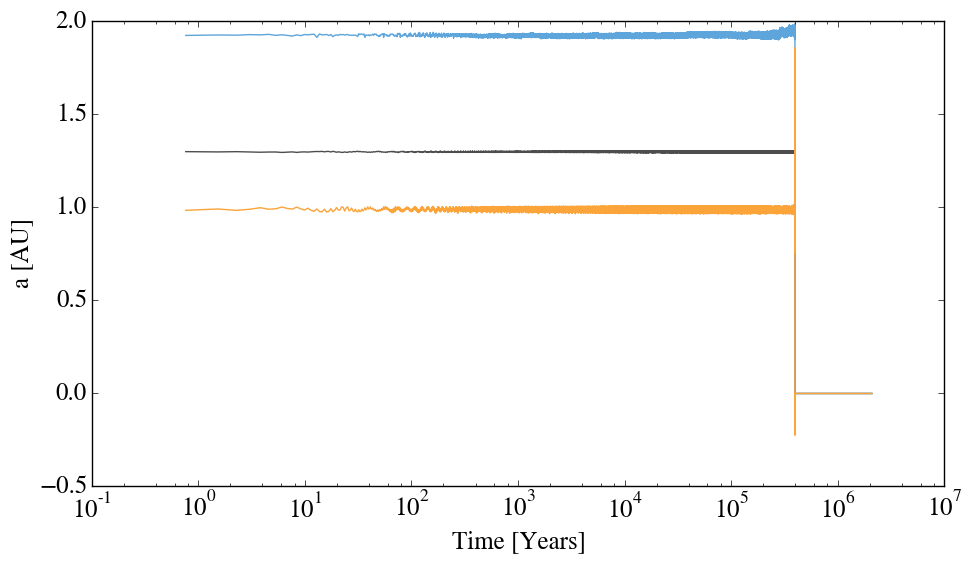

In [117]:
HD1502.orbit_stab(periods=1e6,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [1]:
HD1502.plot_phi(pert_ind=0,test_ind=2,p=2,q=1,periods=200)

NameError: name 'HD1502' is not defined

# Refit Offsets

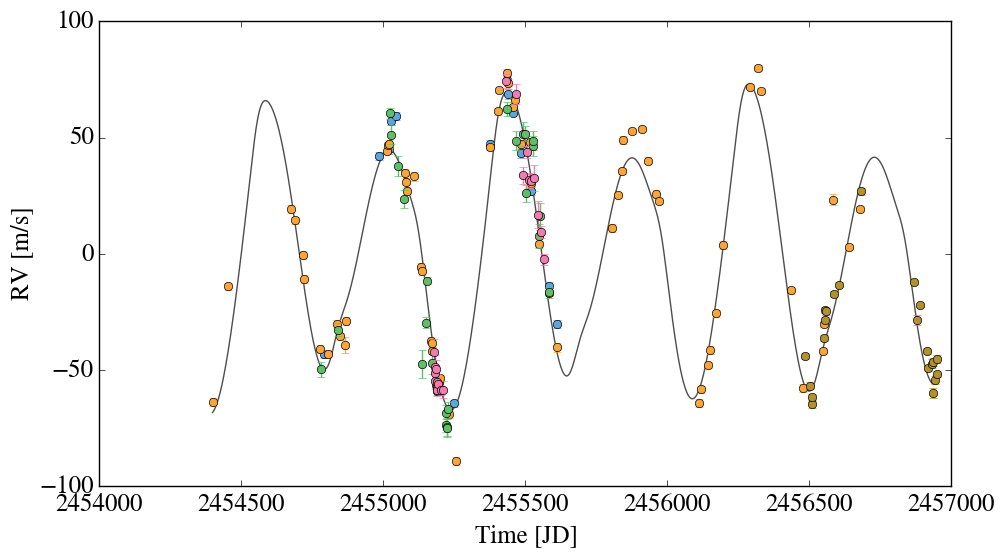

In [213]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc_tmp[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc_tmp[1], pomega = ang_params[4])

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = 3*HD1502.planets[0].l - 2*lam_3 - phi
M_3 = (lam_3 - pomega_3)%360.

HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc_tmp[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [214]:
def fit_offsets(offsets):
    
    HD1502 = RVSystem(mstar = 1.61)
    epoch = 2454410.0

    HD1502.clear_planets()

    new_params = np.loadtxt('opt_per_mass_from_rmc')
    ecc_tmp = np.loadtxt('ecc_tmp')
    ang_params = np.loadtxt('ang_params')

    HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc_tmp[0], pomega = ang_params[2])
    HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc_tmp[1], pomega = ang_params[4])

    phi = ang_params[0]
    lam_3 = 146.84729
    pomega_3 = 3*HD1502.planets[0].l - 2*lam_3 - phi
    M_3 = (lam_3 - pomega_3)%360.

    HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc_tmp[2], pomega = pomega_3)

    # HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
    # HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
    # HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


    HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
    HD1502.offsets = offsets
    # HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
    HD1502.path_to_data = "/Applications/Systemic/datafiles/"
    
    return -HD1502.log_like(epoch=epoch)

In [215]:
offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
fit_offsets(offsets)

2268.6973360245329

In [216]:
t_0 = time.time()
result = op.minimize(fit_offsets,offsets)
print "That took  %.3f seconds" %(time.time()-t_0)

That took  3.422 seconds


In [217]:
result.x

array([ 27.75267241,   2.11360448,  16.24621673, -11.3583535 ,  41.65376544])

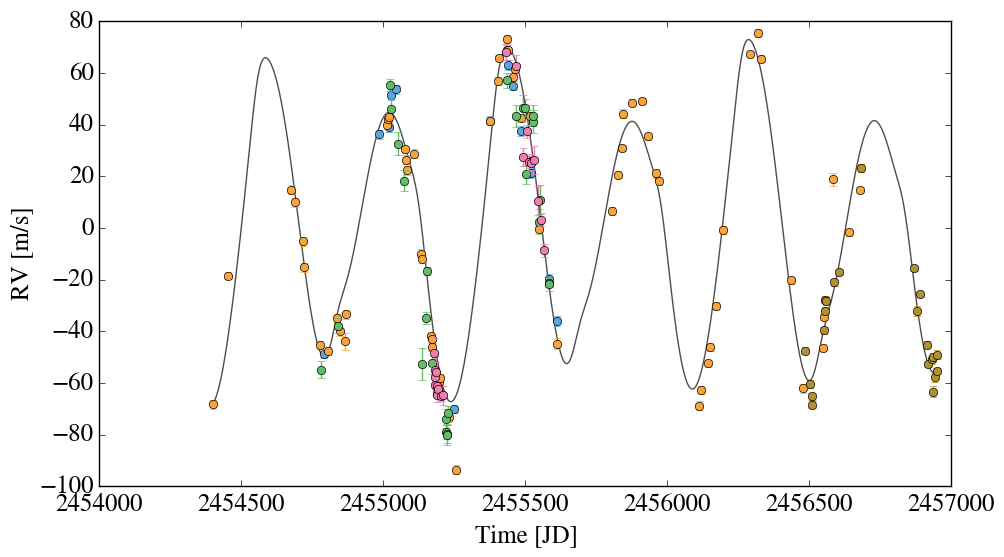

In [235]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc_tmp[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc_tmp[1], pomega = ang_params[4])

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = 3*HD1502.planets[0].l - 2*lam_3 - phi
M_3 = (lam_3 - pomega_3)%360.

HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc_tmp[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
# HD1502.offsets = result.x
HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [236]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

30.642381949432938

In [225]:
print new_params
print ang_params
print ecc_tmp

[  4.27572481e+02   2.87887973e+00   7.63857742e+02   4.92420795e-01
   2.78659908e+02   4.16761902e-01]
[ 337.94189861   64.1466781   137.41898942  118.54069994   75.60774816]
[  1.28708700e-02   1.00000000e-05   3.25000000e-01]


In [226]:
427.57/293.67744

1.4559170769126835

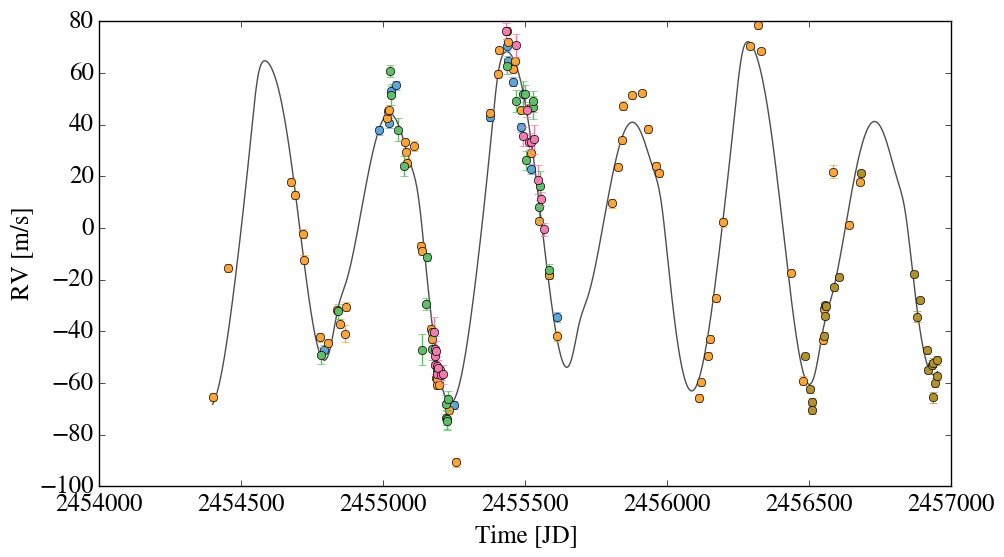

In [32]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
ecc = [0.03,0,0.38]

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = (3*HD1502.planets[0].l - 2*lam_3 - phi)%360.
M_3 = (lam_3 - pomega_3)%360.

HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [33]:
print HD1502.calc_chi2(epoch=epoch)/(152-20), HD1502.log_like(epoch=epoch)

26.1410175157 -1967.49177944


In [260]:
np.savetxt('offsets_better',result.x)

 0 %
Integration took 19.42268 seconds
Energy Error is 9.293% 
Planet 2 went unstable


0

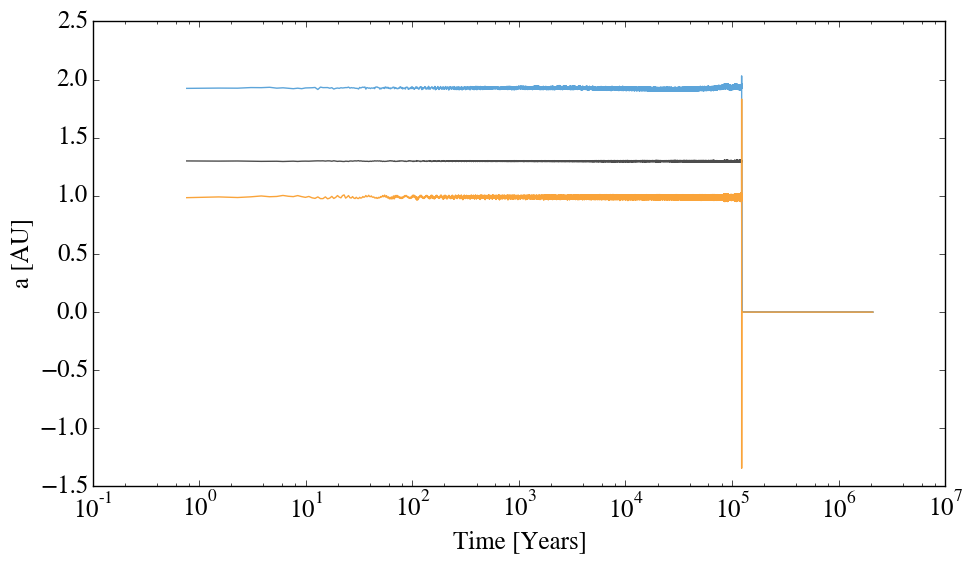

In [34]:
HD1502.orbit_stab(periods=1e6,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 6.04747 seconds
Energy Error is 0.024% 


1

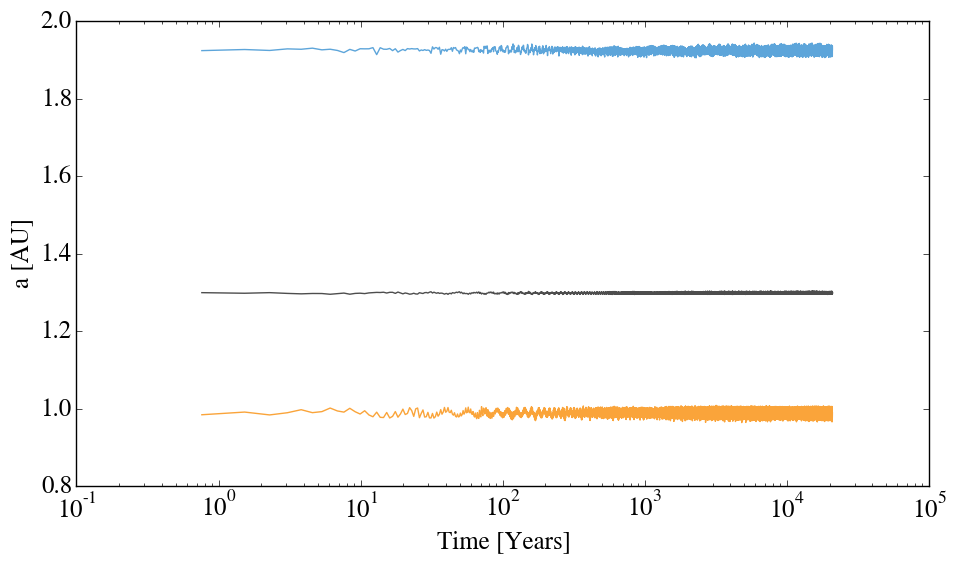

In [254]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=10,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [268]:
param_arr = np.zeros((len(HD1502.planets),7))

for i,planet in enumerate(HD1502.planets):
    arr_tmp = [planet.per, planet.mass/9.5458e-4, planet.M, planet.e, planet.pomega, planet.i, planet.Omega]
    param_arr[i] = arr_tmp

In [3]:
HD1502.save_params('tst_save')

In [4]:
tst = np.loadtxt('tst_save')

In [6]:
tst[0]

array([  4.27572481e+02,   2.87887973e+00,   6.41466781e+01,
         1.28708700e-02,   1.37418989e+02,   9.00000000e+01,
         0.00000000e+00])

# MCMC

In [56]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')

HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = 333.06052395421369
# pomega_3 = (3*RVsys.planets[0].l - 2*lam_3 - phi)%360.
# M_3 = (lam_3 - pomega_3)%360.
M_3 = 173.78676604578629

In [57]:
def lnlike(params,other_params,RVsys):
    per_0, per_1, per_2 = params
#     M, pomega, i, Omega = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per = per_0, mass = new_params[1] , M = ang_params[1], e=ecc_tmp[0], pomega = ang_params[2])
    RVsys.add_planet(per = per_1, mass = new_params[3], M = ang_params[3], e=ecc_tmp[1], pomega = ang_params[4])
    RVsys.add_planet(per = per_2, mass = new_params[5], M = M_3, e=ecc_tmp[2], pomega = pomega_3)
    
    return RVsys.log_like(epoch=epoch)


In [51]:
def lnprior(params):
    per_0, per_1, per_2 = params
    if 100. < per_0 < 1200. and 100. < per_1 < 1200. and 100. < per_2 < 1200.:
        return 0.0
    return -np.inf

In [52]:
def lnprob(params, other_params, RVsys):
    lp = lnprior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(params, other_params, RVsys)

In [53]:
ndim, nwalkers = 3, 100
# start = [827.9233,0.75655,0.05685]
start = [new_params[0],new_params[2],new_params[4]]
pos = [start + 1e1*np.random.randn(ndim) for i in range(nwalkers)]

In [54]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(0,HD1502),threads=15)

In [55]:
t_0 = time.time()
nsteps = 500
for i, result in enumerate(sampler.sample(pos, iterations=nsteps)):
    if (float(i+1)/nsteps*100.) % 1 == 0:
        print "%3i %%" %(float(i+1)/nsteps*100.)
print "That took  %.3f seconds" %(time.time()-t_0)

  1 %
  2 %


KeyboardInterrupt: 

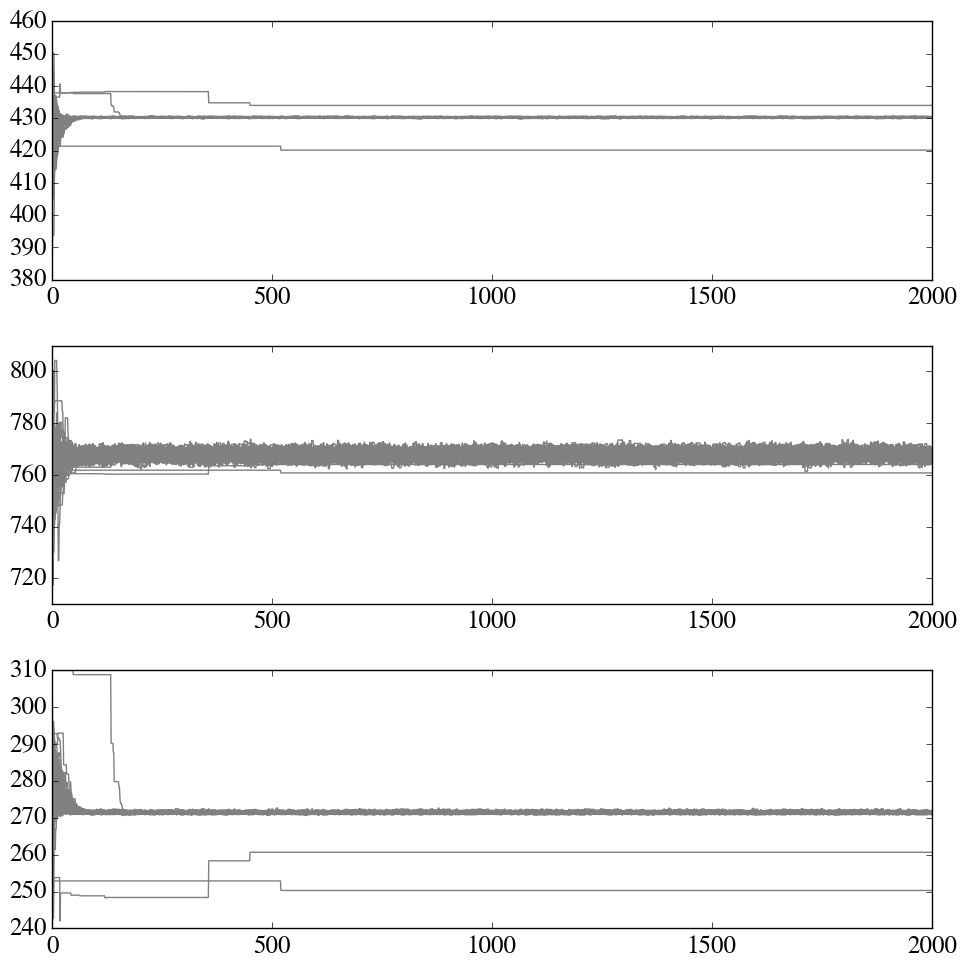

In [47]:
fig = plt.figure(1,figsize=(10,10))

for i in range(len(sampler.chain)):
    plt.subplot(311)
    plt.plot(sampler.chain[i,:,0],color='gray')
    
    plt.subplot(312)
    plt.plot(sampler.chain[i,:,1],color='gray')
    
    plt.subplot(313)
    plt.plot(sampler.chain[i,:,2],color='gray')
    
plt.tight_layout()

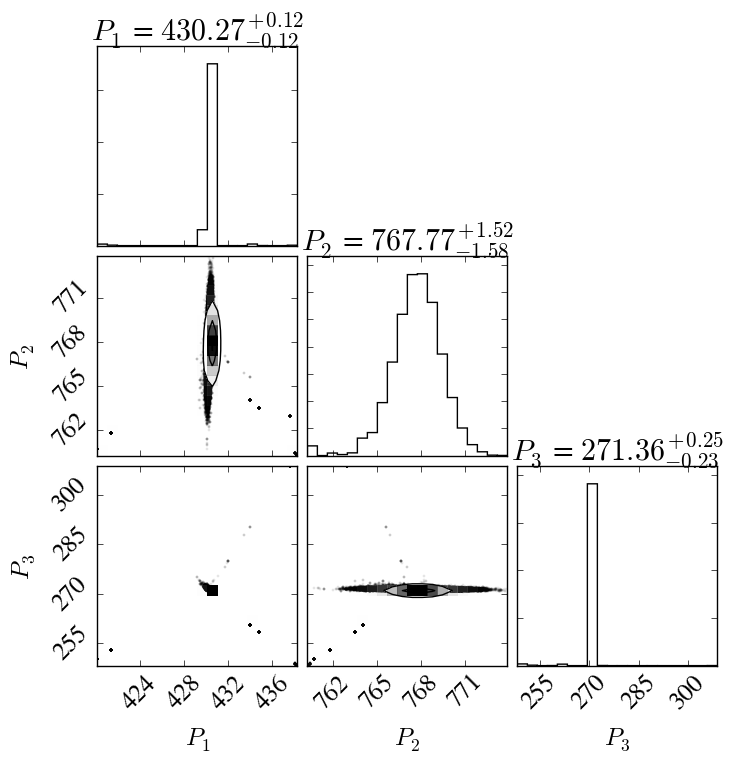

In [48]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$P_1$", "$P_2$", "$P_3$"],show_titles=True
                      )

In [63]:
np.savetxt('mcmc_1',tst)

TypeError: Mismatch between array dtype ('float64') and format specifier ('%.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e %.18e')

In [56]:
sampler.chain

array([[[  440.74771286,   773.53198908,   282.14161556],
        [  437.9838544 ,   771.79549442,   280.68635793],
        [  434.16129346,   775.87157956,   276.52464827],
        ..., 
        [  427.07514023,   772.97200921,   253.47756563],
        [  427.07514023,   772.97200921,   253.47756563],
        [  427.07514023,   772.97200921,   253.47756563]],

       [[  428.77022276,   772.27193332,   264.76650659],
        [  428.77022276,   772.27193332,   264.76650659],
        [  428.77022276,   772.27193332,   264.76650659],
        ..., 
        [  427.02450465,   775.39120709,  1126.57441277],
        [  427.10109188,   775.11005226,   784.21583304],
        [  427.12114506,   775.71511048,   640.38042257]],

       [[  434.70930845,   749.73623691,   273.15608917],
        [  434.70930845,   749.73623691,   273.15608917],
        [  433.74457033,   751.95352968,   276.74004114],
        ..., 
        [  427.05128658,   775.28020387,   427.12790388],
        [  427.05128658,  

In [77]:
tst = sampler.chain[:,:,:]

In [69]:
np.shape(tst)

(100, 500, 3)

In [82]:
f=open('mcmc_2.txt','ab')
for i in range(np.shape(tst)[0]):
    for j in range(np.shape(tst)[1]):
        f.write("%.7f %.7f %.7f \n" %(tst[i,j,0],tst[i,j,1],tst[i,j,2]))
#         np.savetxt(f,sampler.chain[i,j,:])
#         np.savetxt(f,'\n')
f.close()

In [59]:
np.savetxt('mcmc_periods.txt',samples)

In [58]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [75]:
sampler.chain[0,0,:]

array([ 440.74771286,  773.53198908,  282.14161556])

In [32]:
print lnlike([new_params[0],new_params[2],new_params[4]],0,HD1502)
print lnlike([new_params[0],new_params[2],278],0,HD1502)

-1991.37380056
-1988.61061886


In [108]:
new_params[4]

278.65990821392904

In [127]:
len(samples)

40000

# Try Mass

In [60]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')

HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = 333.06052395421369
# pomega_3 = (3*RVsys.planets[0].l - 2*lam_3 - phi)%360.
# M_3 = (lam_3 - pomega_3)%360.
M_3 = 173.78676604578629

In [61]:
def lnlike(params,other_params,RVsys):
    mass_0, mass_1, mass_2 = params
#     M, pomega, i, Omega = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per = new_params[0], mass = mass_0, M = ang_params[1], e=ecc_tmp[0], pomega = ang_params[2])
    RVsys.add_planet(per = new_params[2], mass = mass_1, M = ang_params[3], e=ecc_tmp[1], pomega = ang_params[4])
    RVsys.add_planet(per = new_params[4], mass = mass_2, M = M_3, e=ecc_tmp[2], pomega = pomega_3)
    
    return RVsys.log_like(epoch=epoch)


In [62]:
def lnprior(params):
    mass_0, mass_1, mass_2 = params
    if 1e-2 < mass_0 < 10. and 1e-2 < mass_1 < 10. and 1e-2 < mass_2 < 10.:
        return 0.0
    return -np.inf

In [63]:
def lnprob(params, other_params, RVsys):
    lp = lnprior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(params, other_params, RVsys)

In [65]:
lnprob([new_params[1],new_params[3],new_params[5]],0,HD1502)

-1991.37380056445

In [69]:
ndim, nwalkers = 3, 100
# start = [827.9233,0.75655,0.05685]
start = [new_params[1],new_params[3],new_params[5]]
pos = [start + 1e-1*np.random.randn(ndim) for i in range(nwalkers)]

In [71]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(0,HD1502),threads=15)

In [72]:
t_0 = time.time()
nsteps = 500
for i, result in enumerate(sampler.sample(pos, iterations=nsteps)):
    if (float(i+1)/nsteps*100.) % 1 == 0:
        print "%3i %%" %(float(i+1)/nsteps*100.)
print "That took  %.3f seconds" %(time.time()-t_0)

  1 %
  2 %
  3 %
  4 %
  5 %
  6 %
  8 %
  9 %
 10 %
 11 %
 12 %
 13 %
 15 %
 16 %
 17 %
 18 %
 19 %
 20 %
 21 %
 22 %
 23 %
 24 %
 25 %
 26 %
 27 %
 30 %
 31 %
 32 %
 33 %
 34 %
 35 %
 36 %
 37 %
 38 %
 39 %
 40 %
 41 %
 42 %
 43 %
 44 %
 45 %
 46 %
 47 %
 48 %
 49 %
 50 %
 51 %
 52 %
 53 %
 54 %
 59 %
 60 %
 61 %
 62 %
 63 %
 64 %
 65 %
 66 %
 67 %
 68 %
 69 %
 70 %
 71 %
 72 %
 73 %
 74 %
 75 %
 76 %
 77 %
 78 %
 79 %
 80 %
 81 %
 82 %
 83 %
 84 %
 85 %
 86 %
 87 %
 88 %
 89 %
 90 %
 91 %
 92 %
 93 %
 94 %
 95 %
 96 %
 97 %
 98 %
 99 %
100 %
That took  577.013 seconds


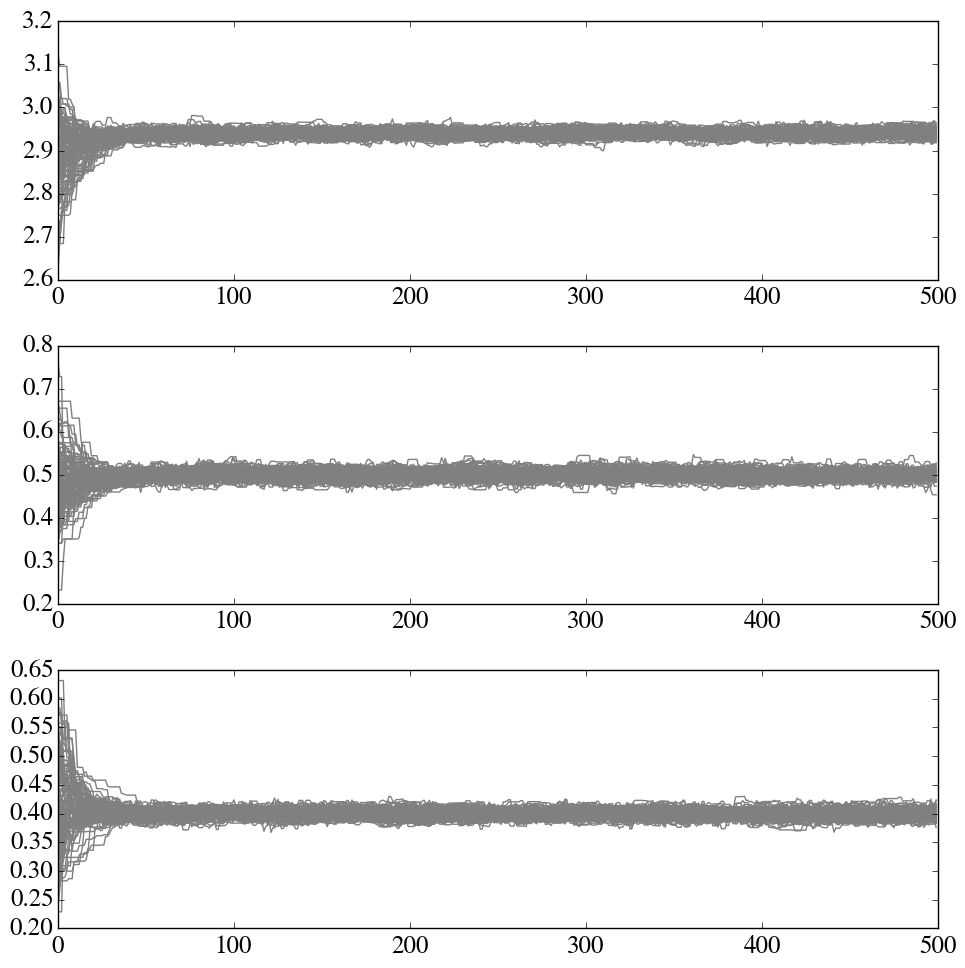

In [73]:
fig = plt.figure(1,figsize=(10,10))

for i in range(len(sampler.chain)):
    plt.subplot(311)
    plt.plot(sampler.chain[i,:,0],color='gray')
    
    plt.subplot(312)
    plt.plot(sampler.chain[i,:,1],color='gray')
    
    plt.subplot(313)
    plt.plot(sampler.chain[i,:,2],color='gray')
    
plt.tight_layout()

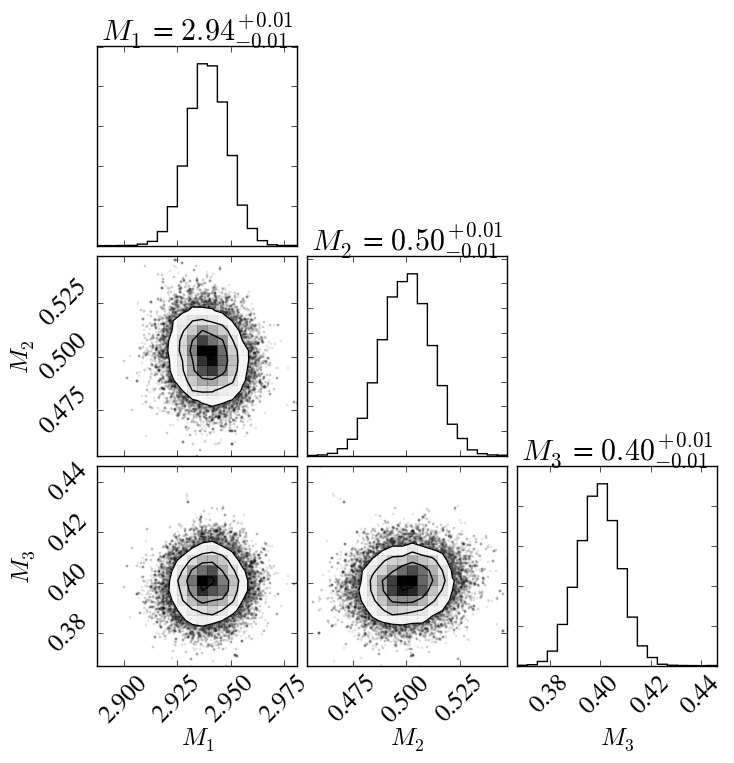

In [75]:
samples = sampler.chain[:, 30:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$M_1$", "$M_2$", "$M_3$"],show_titles=True
                      )

In [76]:
start

[2.8788797293639918, 0.49242079462244215, 0.41676190180464984]

In [77]:
HD1502.save_params('MMR_HD1502_params')

# Mass and Period?

In [128]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')

HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = 333.06052395421369
# pomega_3 = (3*RVsys.planets[0].l - 2*lam_3 - phi)%360.
# M_3 = (lam_3 - pomega_3)%360.
M_3 = 173.78676604578629

In [129]:
def lnlike(params,other_params,RVsys):
    per_0, mass_0, per_1, mass_1, per_2, mass_2 = params
#     M, pomega, i, Omega = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per = per_0, mass = mass_0 , M = ang_params[1], e=ecc_tmp[0], pomega = ang_params[2])
    RVsys.add_planet(per = per_1, mass = mass_1, M = ang_params[3], e=ecc_tmp[1], pomega = ang_params[4])
    RVsys.add_planet(per = per_2, mass = mass_2, M = M_3, e=ecc_tmp[2], pomega = pomega_3)
    
    return RVsys.log_like(epoch=epoch)


In [130]:
def lnprior(params):
    per_0, mass_0, per_1, mass_1, per_2, mass_2 = params
    if 1e-2 < mass_0 < 10. and 1e-2 < mass_1 < 10. and 1e-2 < mass_2 < 10. \
    and 100. < per_0 < 1200. and 100. < per_1 < 1200. and 100. < per_2 < 1200.:
        return 0.0
    return -np.inf

In [131]:
def lnprob(params, other_params, RVsys):
    lp = lnprior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(params, other_params, RVsys)

In [122]:
factors = [1e1,1e-1,1e1,1e-1,1e1,1e-1]
tst = np.random.randn(6)
print tst, tst*factors

[ 1.11669858 -0.71439292  1.31410624  0.88346754 -0.48506859  1.24741841] [ 11.16698577  -0.07143929  13.1410624    0.08834675  -4.85068595
   0.12474184]


In [132]:
ndim, nwalkers = 6, 100
# start = [827.9233,0.75655,0.05685]
start = new_params
factors = [1e1,1e-1,1e1,1e-1,1e1,1e-1]

pos = [start + factors*np.random.randn(ndim) for i in range(nwalkers)]

In [133]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(0,HD1502),threads=15)

In [134]:
t_0 = time.time()
nsteps = 3000
for i, result in enumerate(sampler.sample(pos, iterations=nsteps)):
    if (float(i+1)/nsteps*100.) % 1 == 0:
        print "%3i %%" %(float(i+1)/nsteps*100.)
print "That took  %.3f seconds" %(time.time()-t_0)

  1 %
  2 %
  3 %
  4 %
  5 %
  6 %
  8 %
  9 %
 10 %
 11 %
 12 %
 13 %
 15 %
 16 %
 17 %
 18 %
 19 %
 20 %
 21 %
 22 %
 23 %
 24 %
 25 %
 26 %
 27 %
 30 %
 31 %
 32 %
 33 %
 34 %
 35 %
 36 %
 37 %
 38 %
 39 %
 40 %
 41 %
 42 %
 43 %
 44 %
 45 %
 46 %
 47 %
 48 %
 49 %
 50 %
 51 %
 52 %
 53 %
 54 %
 59 %
 60 %
 61 %
 62 %
 63 %
 64 %
 65 %
 66 %
 67 %
 68 %
 69 %
 70 %
 71 %
 72 %
 73 %
 74 %
 75 %
 76 %
 77 %
 78 %
 79 %
 80 %
 81 %
 82 %
 83 %
 84 %
 85 %
 86 %
 87 %
 88 %
 89 %
 90 %
 91 %
 92 %
 93 %
 94 %
 95 %
 96 %
 97 %
 98 %
 99 %
100 %
That took  4967.644 seconds


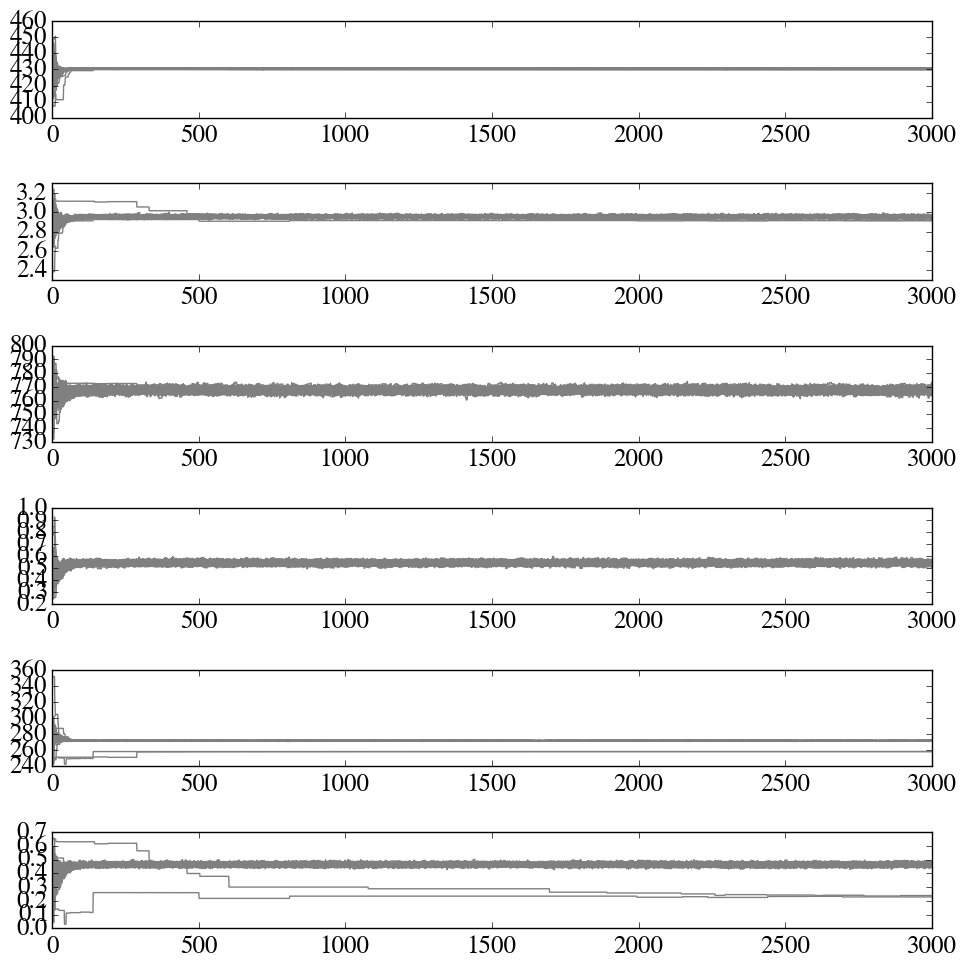

In [135]:
fig = plt.figure(1,figsize=(10,10))

for i in range(len(sampler.chain)):
    plt.subplot(611)
    plt.plot(sampler.chain[i,:,0],color='gray')
    
    plt.subplot(612)
    plt.plot(sampler.chain[i,:,1],color='gray')
    
    plt.subplot(613)
    plt.plot(sampler.chain[i,:,2],color='gray')
    
    plt.subplot(614)
    plt.plot(sampler.chain[i,:,3],color='gray')
    
    plt.subplot(615)
    plt.plot(sampler.chain[i,:,4],color='gray')
    
    plt.subplot(616)
    plt.plot(sampler.chain[i,:,5],color='gray')
    
plt.tight_layout()

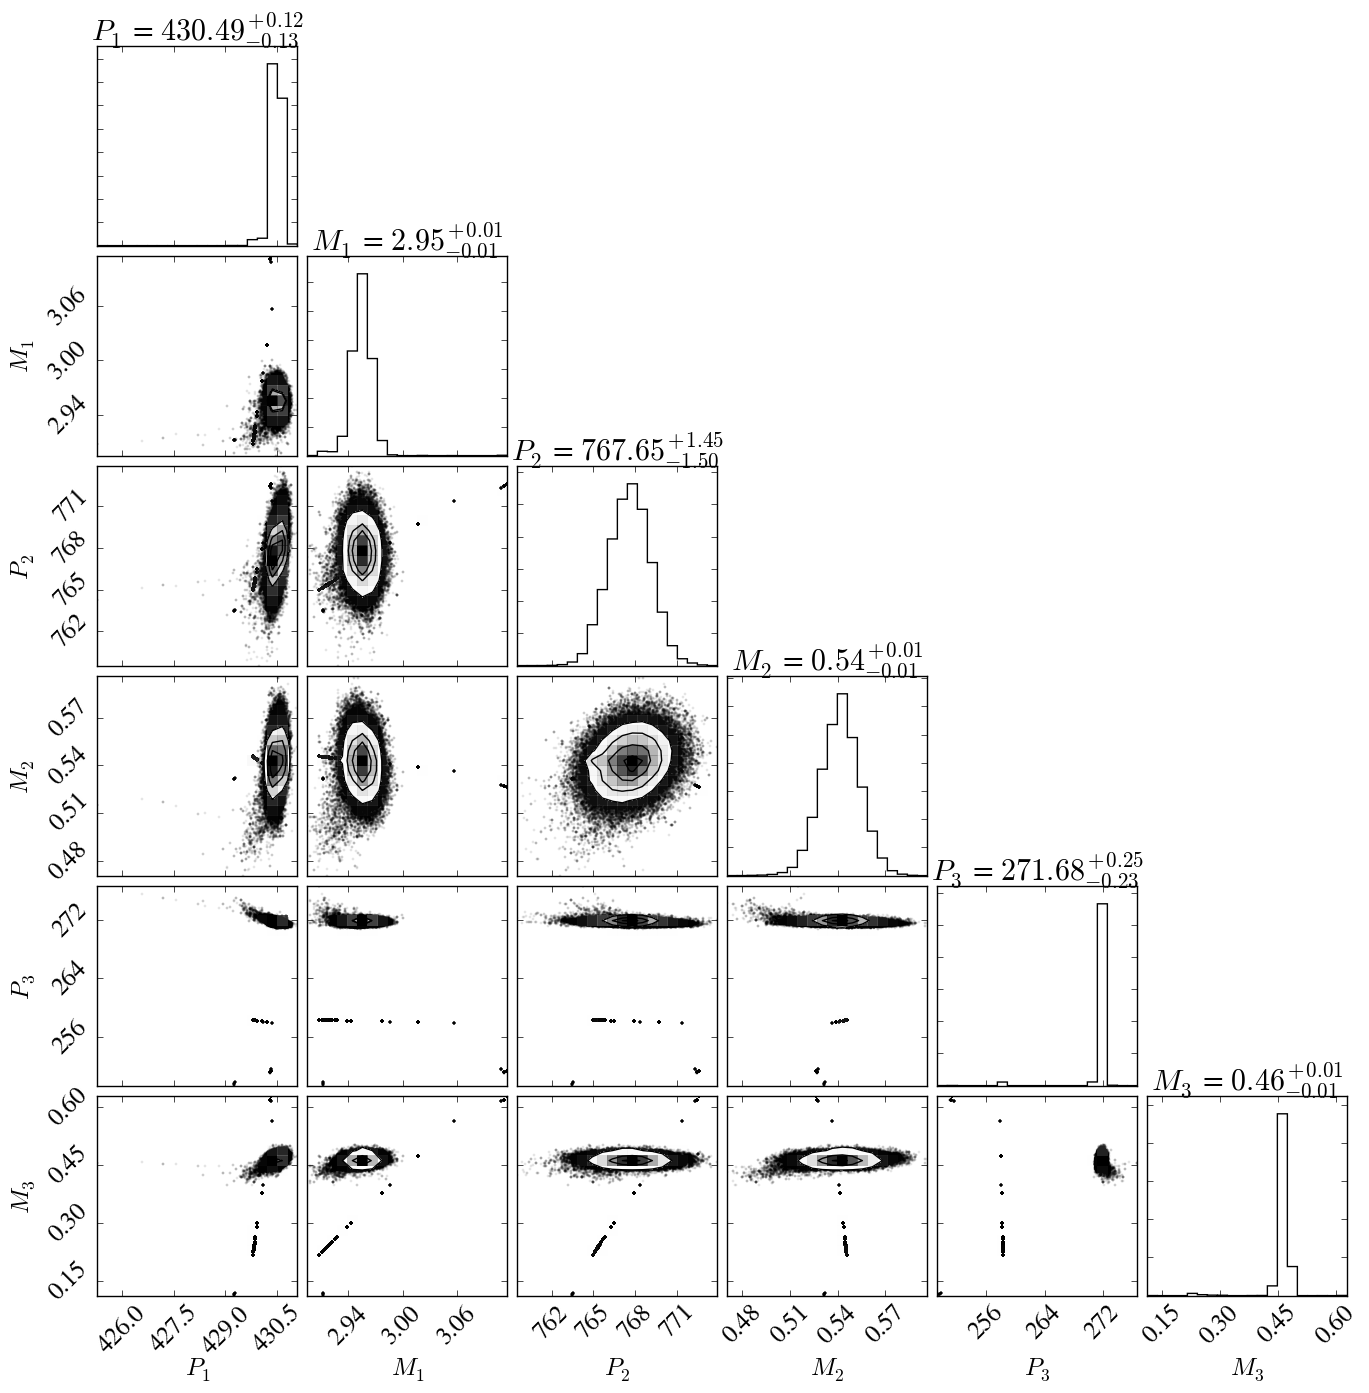

In [136]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$P_1$", "$M_1$", "$P_2$", "$M_2$", "$P_3$", "$M_3$"],show_titles=True
                      )

In [137]:
np.savetxt('per_mass_nostab',sampler.chain.reshape((-1, ndim)))

# Optimization over Eccentricity

In [18]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')

HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = 333.06052395421369
# pomega_3 = (3*RVsys.planets[0].l - 2*lam_3 - phi)%360.
# M_3 = (lam_3 - pomega_3)%360.
M_3 = 173.78676604578629

In [19]:
def lnlike(params,other_params,RVsys):
    ecc_0, ecc_1, ecc_2 = np.power(10,params)
#     M, pomega, i, Omega = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc_0, pomega = ang_params[2])
    RVsys.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc_1, pomega = ang_params[4])
    RVsys.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc_2, pomega = pomega_3)
    
    return RVsys.log_like(epoch=epoch)


In [20]:
def lnprior(params):
    ecc_0, ecc_1, ecc_2 = params
    if -6. < ecc_0 < -0.3 and -6. < ecc_1 < -0.3 and -6. < ecc_2 < -0.3:
        return 0.0
    return -np.inf

In [21]:
def lnprob(params, other_params, RVsys):
    lp = lnprior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(params, other_params, RVsys)

In [22]:
ndim, nwalkers = 3, 100
start = [-1.8903921 , -3. , -0.48811664]
# start = np.log10(ecc_tmp)
factors = [0.5,1.,0.1]

pos = [start + factors*np.random.randn(ndim) for i in range(nwalkers)]

In [23]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(0,HD1502),threads=15)

In [25]:
t_0 = time.time()
nsteps = 1000
for i, result in enumerate(sampler.sample(pos, iterations=nsteps)):
    if (float(i+1)/nsteps*100.) % 1 == 0:
        print "%3i %%" %(float(i+1)/nsteps*100.)
print "That took  %.3f seconds" %(time.time()-t_0)

//anaconda/lib/python2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
//anaconda/lib/python2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


  1 %
  2 %
  3 %
  4 %
  5 %
  6 %
  8 %
  9 %
 10 %
 11 %
 12 %
 13 %
 15 %
 16 %
 17 %
 18 %
 19 %
 20 %
 21 %
 22 %
 23 %
 24 %
 25 %
 26 %
 27 %
 30 %
 31 %
 32 %
 33 %
 34 %
 35 %
 36 %
 37 %
 38 %
 39 %
 40 %
 41 %
 42 %
 43 %
 44 %
 45 %
 46 %
 47 %
 48 %
 49 %
 50 %
 51 %
 52 %
 53 %
 54 %
 59 %
 60 %
 61 %
 62 %
 63 %
 64 %
 65 %
 66 %
 67 %
 68 %
 69 %
 70 %
 71 %
 72 %
 73 %
 74 %
 75 %
 76 %
 77 %
 78 %
 79 %
 80 %
 81 %
 82 %
 83 %
 84 %
 85 %
 86 %
 87 %
 88 %
 89 %
 90 %
 91 %
 92 %
 93 %
 94 %
 95 %
 96 %
 97 %
 98 %
 99 %
100 %
That took  1119.720 seconds


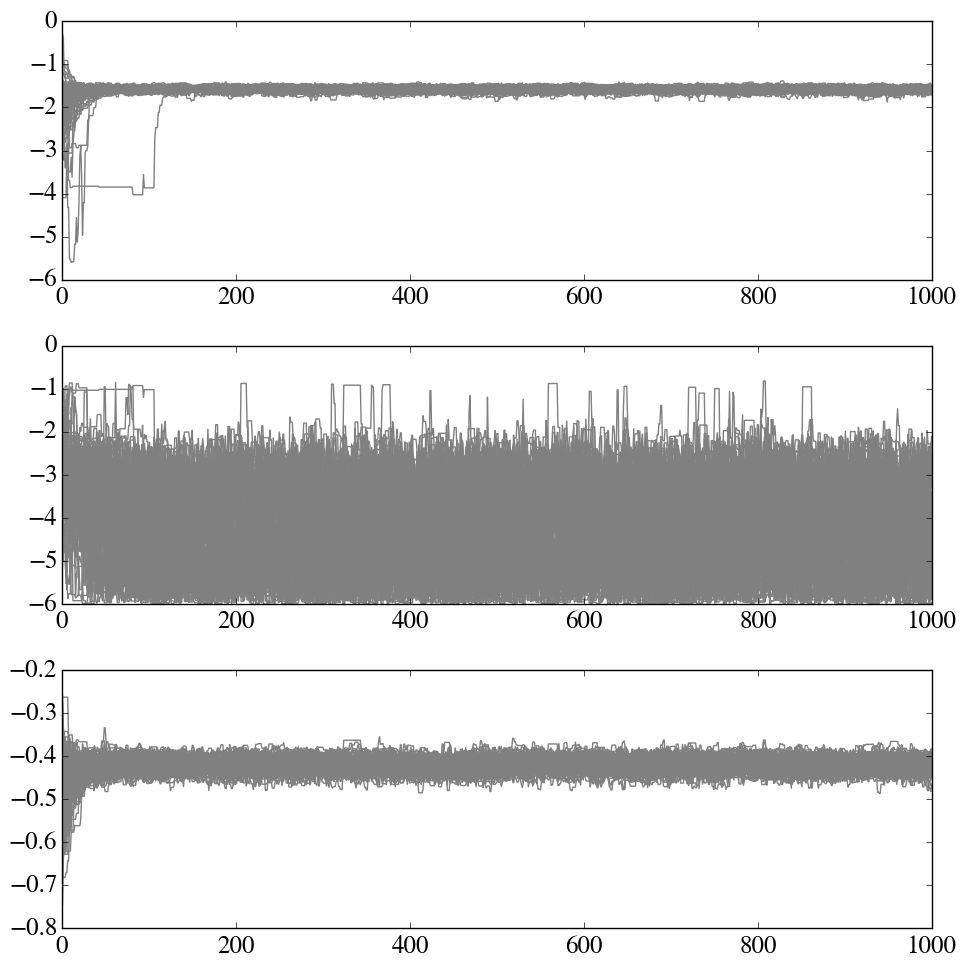

In [26]:
fig = plt.figure(1,figsize=(10,10))

for i in range(len(sampler.chain)):
    plt.subplot(311)
    plt.plot(sampler.chain[i,:,0],color='gray')
    
    plt.subplot(312)
    plt.plot(sampler.chain[i,:,1],color='gray')
    
    plt.subplot(313)
    plt.plot(sampler.chain[i,:,2],color='gray')
    
plt.tight_layout()

In [26]:
burn_index = 200
# samples = np.power(10,sampler.chain[:, burn_index:, :].reshape((-1, ndim)))
samples = sampler.chain[:, burn_index:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$e_0$", "$e_1$", "$e_2$"],show_titles=True
                      )

NameError: name 'sampler' is not defined

In [37]:
np.savetxt('ecc_MCMC_no_stab',sampler.chain.reshape((-1, ndim)))

# Eccentricity Testing

In [9]:
def lnlike(params,other_params,RVsys):
    ecc_0, ecc_1, ecc_2 = np.power(10,params)
#     M, pomega, i, Omega = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc_0, pomega = ang_params[2])
    RVsys.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc_1, pomega = ang_params[4])
    RVsys.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc_2, pomega = pomega_3)
    
    return RVsys.stab_logprob(epoch=epoch)


In [15]:
tst = [-1.14905468, -4.29303333, -0.37309235]
lnlike(tst,0,HD1502)

-inf

In [16]:
tst = [-1.14905468, -4.29303333, -0.37309235]
ecc_0,ecc_1,ecc_2 = np.power(10,tst)

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc_0, pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc_1, pomega = ang_params[4])
HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc_2, pomega = pomega_3)

 0 %
Integration took 0.00150 seconds
Energy Error is 331804.536% 
Planet 5 went unstable


0

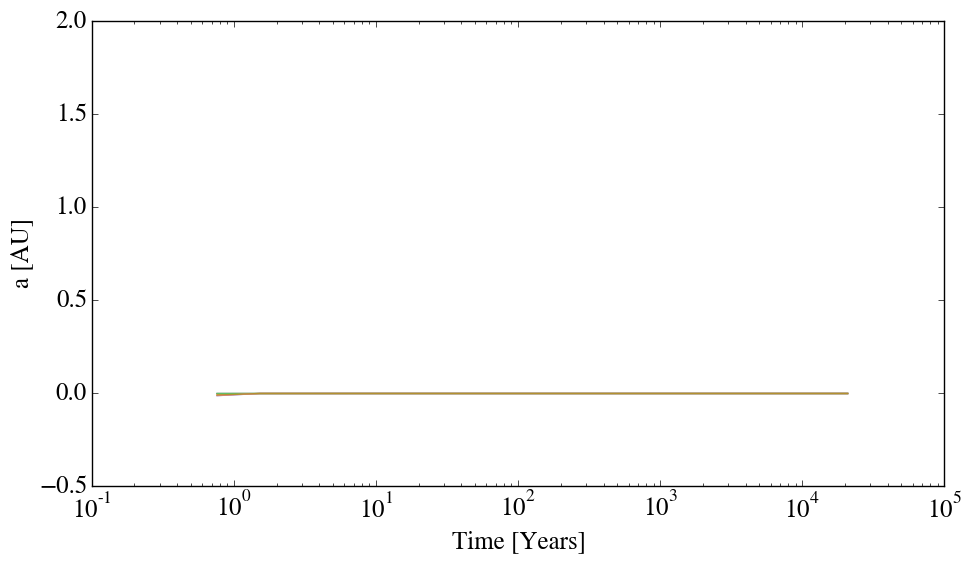

In [17]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=10,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

# Check Stability with New Values

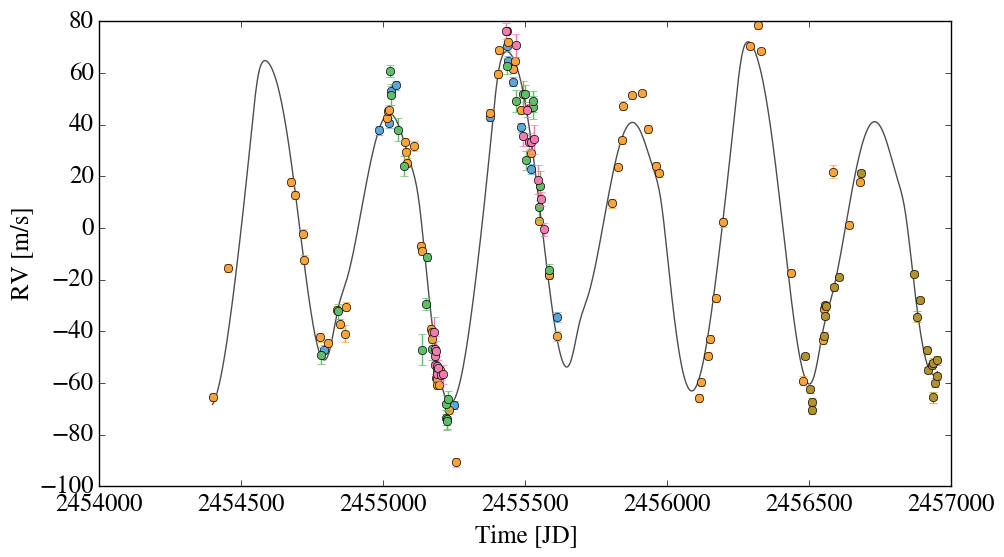

In [25]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
ecc = [0.03,0,0.37]

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = (3*HD1502.planets[0].l - 2*lam_3 - phi)%360.
M_3 = (lam_3 - pomega_3)%360.

HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [23]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

23.164828836323736

 0 %
Integration took 0.01364 seconds
Energy Error is 45.197% 
Planet 2 went unstable


0

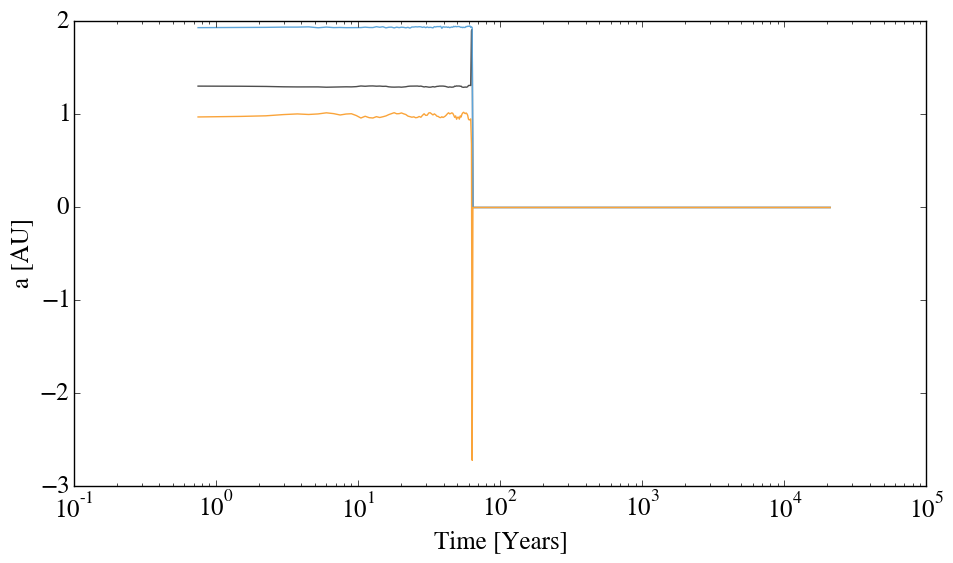

In [24]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [32]:
(new_params[2]/new_params[0])

1.7864988439657099

In [33]:
9./5.

1.8